In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # data viz library
import math

In [2]:
data = pd.read_csv('../Dataset/Training/Features_Variant_1.csv')
data  # 54 features, 40948 data instances

,634995,0,463,1,0.0,806.0,11.291044776119403,1.0,70.49513846124168,0.0.1,...,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,1.2,0.19
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,1,0,0,0,0,0,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40943,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,1
40944,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,2
40945,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,1,0,0,72
40946,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,28


In [3]:
# a) review feature names
data.columns  # we need to assign these columns to their descriptions provided in the paper

Index(['634995', '0', '463', '1', '0.0', '806.0', '11.291044776119403', '1.0',
       '70.49513846124168', '0.0.1', '806.0.1', '7.574626865671642', '0.0.2',
       '69.435826365571', '0.0.3', '76.0', '2.6044776119402986', '0.0.4',
       '8.50550186882253', '0.0.5', '806.0.2', '10.649253731343284', '1.0.1',
       '70.25478763764251', '-69.0', '806.0.3', '4.970149253731344', '0.0.6',
       '69.85058043098057', '0.1', '0.2', '0.3', '0.4', '0.5', '65', '166',
       '2', '0.6', '24', '0.7', '0.8', '0.9', '1.1', '0.10', '0.11', '0.12',
       '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '1.2', '0.19'],
      dtype='object')

## Understanding the columns
Breakdown of each Column
# Facebook Comment Volume Prediction Features

## Page Features
| Feature | Description |
|---------|-------------|
| Page likes | Measures user support for a page, indicating popularity and potential reach. |
| Page category | Type of page (local business, brand, company, artist, entertainment, etc.) affecting engagement patterns. |
| Page checkins | Number of users who marked their presence at the location (for place-type pages only). |
| Page talking about | Count of users actively engaged with the page (commenting, liking, sharing). |

## Essential Features (C1-C5)
| Feature | Description |
|---------|-------------|
| C1: Total comment count | Total comments received before the selected base date/time. |
| C2: Recent comment count | Comments received in the last 24 hours relative to base date/time. |
| C3: Previous period comment count | Comments received in the period from 48 to 24 hours before base date/time. |
| C4: First-day comment count | Comments received in first 24 hours after post publication. |
| C5: Rate of change | Difference between recent (C2) and previous period (C3) comment counts. |

## Derived Essential Features (25 features)
| Feature | Description |
|---------|-------------|
| Min, Max, Average, Median, StdDev of C1 | Statistical aggregations of C1 across all posts from the same source. |
| Min, Max, Average, Median, StdDev of C2 | Statistical aggregations of C2 across all posts from the same source. |
| Min, Max, Average, Median, StdDev of C3 | Statistical aggregations of C3 across all posts from the same source. |
| Min, Max, Average, Median, StdDev of C4 | Statistical aggregations of C4 across all posts from the same source. |
| Min, Max, Average, Median, StdDev of C5 | Statistical aggregations of C5 across all posts from the same source. |

## Weekday Features (14 features)
| Feature | Description |
|---------|-------------|
| Day of week post published (7 binary indicators) | Binary flags (0/1) indicating which day of the week the post was published. |
| Day of week at base date/time (7 binary indicators) | Binary flags (0/1) indicating which day of the week the base date/time falls on. |

## Other Basic Features
| Feature | Description |
|---------|-------------|
| Document length | Size/length of the post content. |
| Time gap | Time elapsed between post publication and selected base date/time (0-71 hours). |
| Document promotion status | Binary indicator (0/1) of whether the post was promoted. |
| Post share count | Number of times the post was shared by users. |
| Additional feature (non-talked) | Feature mentioned in notes but not clearly defined in the paper. |

In [4]:
# references:
# https://archive.ics.uci.edu/dataset/363/facebook+comment+volume+dataset
# https://uksim.info/uksim2015/data/8713a015.pdf
columns = [
    "Page_Popularity_Likes", "Page_Checkins", "Page_Talking_About", "Page_Category",
    "Derived_1", "Derived_2", "Derived_3", "Derived_4", "Derived_5",
    "Derived_6", "Derived_7", "Derived_8", "Derived_9", "Derived_10",
    "Derived_11", "Derived_12", "Derived_13", "Derived_14", "Derived_15",
    "Derived_16", "Derived_17", "Derived_18", "Derived_19", "Derived_20",
    "Derived_21", "Derived_22", "Derived_23", "Derived_24", "Derived_25",
    "CC1_Total_Comments", "CC2_Comments_Last_24h", "CC3_Comments_48_to_24h",
    "CC4_Comments_First_24h", "CC5_CC2_CC3_Difference", "Base_Time",
    "Post_Length", "Post_Share_Count", "Post_Promotion_Status", "H_Local",
    "Published_Sunday", "Published_Monday", "Published_Tuesday",
    "Published_Wednesday", "Published_Thursday", "Published_Friday",
    "Published_Saturday", "BaseDate_Sunday", "BaseDate_Monday",
    "BaseDate_Tuesday", "BaseDate_Wednesday", "BaseDate_Thursday",
    "BaseDate_Friday", "BaseDate_Saturday", "Target_Comment_Volume"
]
data.columns = columns
data.columns

Index(['Page_Popularity_Likes', 'Page_Checkins', 'Page_Talking_About',
       'Page_Category', 'Derived_1', 'Derived_2', 'Derived_3', 'Derived_4',
       'Derived_5', 'Derived_6', 'Derived_7', 'Derived_8', 'Derived_9',
       'Derived_10', 'Derived_11', 'Derived_12', 'Derived_13', 'Derived_14',
       'Derived_15', 'Derived_16', 'Derived_17', 'Derived_18', 'Derived_19',
       'Derived_20', 'Derived_21', 'Derived_22', 'Derived_23', 'Derived_24',
       'Derived_25', 'CC1_Total_Comments', 'CC2_Comments_Last_24h',
       'CC3_Comments_48_to_24h', 'CC4_Comments_First_24h',
       'CC5_CC2_CC3_Difference', 'Base_Time', 'Post_Length',
       'Post_Share_Count', 'Post_Promotion_Status', 'H_Local',
       'Published_Sunday', 'Published_Monday', 'Published_Tuesday',
       'Published_Wednesday', 'Published_Thursday', 'Published_Friday',
       'Published_Saturday', 'BaseDate_Sunday', 'BaseDate_Monday',
       'BaseDate_Tuesday', 'BaseDate_Wednesday', 'BaseDate_Thursday',
       'BaseDate_Frida

In [5]:
category_mapping = {
    1: "Product/service", 2: "Public figure", 3: "Retail and consumer merchandise",
    4: "Athlete", 5: "Education website", 6: "Arts/entertainment/nightlife",
    7: "Aerospace/defense", 8: "Actor/director", 9: "Professional sports team",
    10: "Travel/leisure", 11: "Arts/humanities website", 12: "Food/beverages",
    13: "Record label", 14: "Movie", 15: "Song", 16: "Community",
    17: "Company", 18: "Artist", 19: "Non-governmental organization (NGO)",
    20: "Media/news/publishing", 21: "Cars", 22: "Clothing", 23: "Local business",
    24: "Musician/band", 25: "Politician", 26: "News/media website",
    27: "Education", 28: "Author", 29: "Sports event", 30: "Restaurant/cafe",
    31: "School sports team", 32: "University", 33: "TV show",
    34: "Website", 35: "Outdoor gear/sporting goods", 36: "Political party",
    37: "Sports league", 38: "Entertainer", 39: "Church/religious organization",
    40: "Non-profit organization", 41: "Automobiles and parts", 42: "TV channel",
    43: "Telecommunication", 44: "Entertainment website", 45: "Shopping/retail",
    46: "Personal blog", 47: "App page", 48: "Vitamins/supplements",
    49: "Professional services", 50: "Movie theater", 51: "Software",
    52: "Magazine", 53: "Electronics", 54: "School", 55: "Just for fun",
    56: "Club", 57: "Comedian", 58: "Sports venue", 59: "Sports/recreation/activities",
    60: "Publisher", 61: "TV network", 62: "Health/medical/pharmacy",
    63: "Studio", 64: "Home decor", 65: "Jewelry/watches", 66: "Writer",
    67: "Health/beauty", 68: "Music video", 69: "Appliances", 70: "Computers/technology",
    71: "Insurance company", 72: "Music award", 73: "Recreation/sports website",
    74: "Reference website", 75: "Business/economy website", 76: "Bar",
    77: "Album", 78: "Games/toys", 79: "Camera/photo", 80: "Book",
    81: "Producer", 82: "Landmark", 83: "Cause", 84: "Organization",
    85: "TV/movie award", 86: "Hotel", 87: "Health/medical/pharmaceuticals",
    88: "Transportation", 89: "Local/travel website", 90: "Musical instrument",
    91: "Radio station", 92: "Other", 93: "Computers", 94: "Phone/tablet",
    95: "Coach", 96: "Tools/equipment", 97: "Internet/software",
    98: "Bank/financial institution", 99: "Society/culture website",
    100: "Small business", 101: "News personality", 102: "Teens/kids website",
    103: "Government official", 104: "Photographer", 105: "Spas/beauty/personal care",
    106: "Video game"
}

data["Page_Category"] = data["Page_Category"].map(category_mapping)

In [6]:
data['Post_Promotion_Status'] = data['Post_Promotion_Status'].replace({0: 'No', 1: 'Yes'})

In [7]:
published_day_mapping = {
    "Published_Sunday": "Sunday",
    "Published_Monday": "Monday",
    "Published_Tuesday": "Tuesday",
    "Published_Wednesday": "Wednesday",
    "Published_Thursday": "Thursday",
    "Published_Friday": "Friday",
    "Published_Saturday": "Saturday"
}

basedate_day_mapping = {
    "BaseDate_Sunday": "Sunday",
    "BaseDate_Monday": "Monday",
    "BaseDate_Tuesday": "Tuesday",
    "BaseDate_Wednesday": "Wednesday",
    "BaseDate_Thursday": "Thursday",
    "BaseDate_Friday": "Friday",
    "BaseDate_Saturday": "Saturday"
}

data['Published_Day'] = data[[*published_day_mapping.keys()]].idxmax(axis=1).map(published_day_mapping)
data['BaseDate_Day'] = data[[*basedate_day_mapping.keys()]].idxmax(axis=1).map(basedate_day_mapping)
data.drop(columns=list(published_day_mapping.keys()) + list(basedate_day_mapping.keys()), inplace=True)
target_col = data.pop('Target_Comment_Volume')
data['Target_Comment_Volume'] = target_col

In [8]:
# b) summary statistics
display(data.describe())

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,Derived_7,...,CC1_Total_Comments,CC2_Comments_Last_24h,CC3_Comments_48_to_24h,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,H_Local,Target_Comment_Volume
count,4.094800e+04,40948.000000,4.094800e+04,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,...,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000,40948.000000
mean,1.313830e+06,4676.247949,4.480133e+04,1.586280,443.324998,55.721469,35.646381,67.464077,0.219473,285.174709,...,55.721745,22.187189,19.650166,52.632876,2.537023,35.321310,163.652413,117.252637,23.767827,7.323068
std,6.785834e+06,20593.423357,1.109349e+05,20.753426,496.698029,86.934332,69.960877,81.569243,10.055268,374.437455,...,136.977101,77.125127,71.079378,128.181221,94.204123,20.916605,376.268981,945.018035,1.919852,35.494965
min,3.600000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1366.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,0.000000,45.000000,5.527273,2.000000,8.278756,0.000000,26.000000,...,2.000000,0.000000,0.000000,2.000000,-6.000000,17.000000,38.000000,2.000000,24.000000,0.000000
50%,2.929110e+05,0.000000,7.141000e+03,0.000000,241.000000,23.374101,12.000000,35.069140,0.000000,118.000000,...,11.000000,2.000000,0.000000,10.500000,0.000000,35.000000,97.000000,13.000000,24.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,0.000000,717.000000,71.828829,42.000000,102.554954,0.000000,405.000000,...,46.000000,12.000000,9.000000,44.000000,3.000000,53.000000,172.000000,61.000000,24.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,2341.000000,2341.000000,2341.000000,2341.000000,731.394558,1923.000000,2079.000000,...,2341.000000,2079.000000,1605.000000,2184.000000,2079.000000,72.000000,21480.000000,144860.000000,24.000000,1305.000000


In [9]:
# c) review data types
data.info()  # all numeric/binary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40948 entries, 0 to 40947
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Page_Popularity_Likes   40948 non-null  int64  
 1   Page_Checkins           40948 non-null  int64  
 2   Page_Talking_About      40948 non-null  int64  
 3   Page_Category           40948 non-null  object 
 4   Derived_1               40948 non-null  float64
 5   Derived_2               40948 non-null  float64
 6   Derived_3               40948 non-null  float64
 7   Derived_4               40948 non-null  float64
 8   Derived_5               40948 non-null  float64
 9   Derived_6               40948 non-null  float64
 10  Derived_7               40948 non-null  float64
 11  Derived_8               40948 non-null  float64
 12  Derived_9               40948 non-null  float64
 13  Derived_10              40948 non-null  float64
 14  Derived_11              40948 non-null

In [10]:
# d) identify anomalies/null values/outliers
print("NULL VALUES CHECK:")
display(data.isnull().sum()) # no explicit null values

NULL VALUES CHECK:


Page_Popularity_Likes     0
Page_Checkins             0
Page_Talking_About        0
Page_Category             0
Derived_1                 0
Derived_2                 0
Derived_3                 0
Derived_4                 0
Derived_5                 0
Derived_6                 0
Derived_7                 0
Derived_8                 0
Derived_9                 0
Derived_10                0
Derived_11                0
Derived_12                0
Derived_13                0
Derived_14                0
Derived_15                0
Derived_16                0
Derived_17                0
Derived_18                0
Derived_19                0
Derived_20                0
Derived_21                0
Derived_22                0
Derived_23                0
Derived_24                0
Derived_25                0
CC1_Total_Comments        0
CC2_Comments_Last_24h     0
CC3_Comments_48_to_24h    0
CC4_Comments_First_24h    0
CC5_CC2_CC3_Difference    0
Base_Time                 0
Post_Length         

In [11]:
# The first occurrence of each duplicate is not marked as True by duplicated() so only subsequent occurrences are considered duplicates
print("DUPLICATES CHECK")
display(data[data.duplicated()])

DUPLICATES CHECK


,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Page_Category,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,...,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,Post_Promotion_Status,H_Local,Published_Day,BaseDate_Day,Target_Comment_Volume
3081,5970921,53096,234501,Professional sports team,4.0,1311.0,141.198830,50.0,239.394133,0.0,...,20,20,12,309,44,No,24,Sunday,Monday,12
4893,4290409,11,131422,Professional sports team,0.0,1184.0,140.889952,65.0,203.263664,0.0,...,136,-26,62,88,70,No,24,Thursday,Sunday,1
4935,4290409,11,131422,Professional sports team,0.0,1184.0,140.889952,65.0,203.263664,0.0,...,146,-59,53,238,106,No,24,Sunday,Tuesday,0
14009,25599,2023,1835,University,0.0,183.0,12.200000,0.0,36.062882,0.0,...,0,0,6,0,1,No,24,Thursday,Thursday,0
15807,1670,0,8,Record label,0.0,5.0,0.277778,0.0,0.803157,0.0,...,0,0,38,0,1,No,24,Friday,Sunday,0
22030,4685,11267,391,University,0.0,5.0,0.538462,0.0,1.194993,0.0,...,0,0,5,0,2,No,24,Friday,Friday,0
26080,2736,491,277,School,0.0,18.0,1.757143,0.5,3.044600,0.0,...,1,0,51,0,1,No,24,Wednesday,Friday,0
36303,296,165,1,Club,0.0,1.0,0.200000,0.0,0.400000,0.0,...,0,0,64,0,1,No,24,Tuesday,Friday,0


In [12]:
print("UNIQUE VALS CHECK")
display(data.nunique())  # Post Promotion Status only has 1 unique val

UNIQUE VALS CHECK


Page_Popularity_Likes      639
Page_Checkins              173
Page_Talking_About         507
Page_Category               81
Derived_1                   65
Derived_2                  363
Derived_3                  577
Derived_4                  215
Derived_5                  594
Derived_6                   35
Derived_7                  302
Derived_8                  551
Derived_9                  115
Derived_10                 566
Derived_11                  12
Derived_12                 307
Derived_13                 541
Derived_14                  93
Derived_15                 560
Derived_16                  63
Derived_17                 363
Derived_18                 572
Derived_19                 206
Derived_20                 591
Derived_21                 282
Derived_22                 301
Derived_23                 544
Derived_24                 102
Derived_25                 585
CC1_Total_Comments         970
CC2_Comments_Last_24h      628
CC3_Comments_48_to_24h     602
CC4_Comm

In [13]:
# e) visualizations
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Page_Category', 'Post_Promotion_Status', 'Published_Day',
       'BaseDate_Day'],
      dtype='object')
Numerical Variables:
['Page_Popularity_Likes', 'Page_Checkins', 'Page_Talking_About', 'Derived_1', 'Derived_2', 'Derived_3', 'Derived_4', 'Derived_5', 'Derived_6', 'Derived_7', 'Derived_8', 'Derived_9', 'Derived_10', 'Derived_11', 'Derived_12', 'Derived_13', 'Derived_14', 'Derived_15', 'Derived_16', 'Derived_17', 'Derived_18', 'Derived_19', 'Derived_20', 'Derived_21', 'Derived_22', 'Derived_23', 'Derived_24', 'Derived_25', 'CC1_Total_Comments', 'CC2_Comments_Last_24h', 'CC3_Comments_48_to_24h', 'CC4_Comments_First_24h', 'CC5_CC2_CC3_Difference', 'Base_Time', 'Post_Length', 'Post_Share_Count', 'H_Local', 'Target_Comment_Volume']


Page_Popularity_Likes
Skew : 56.09


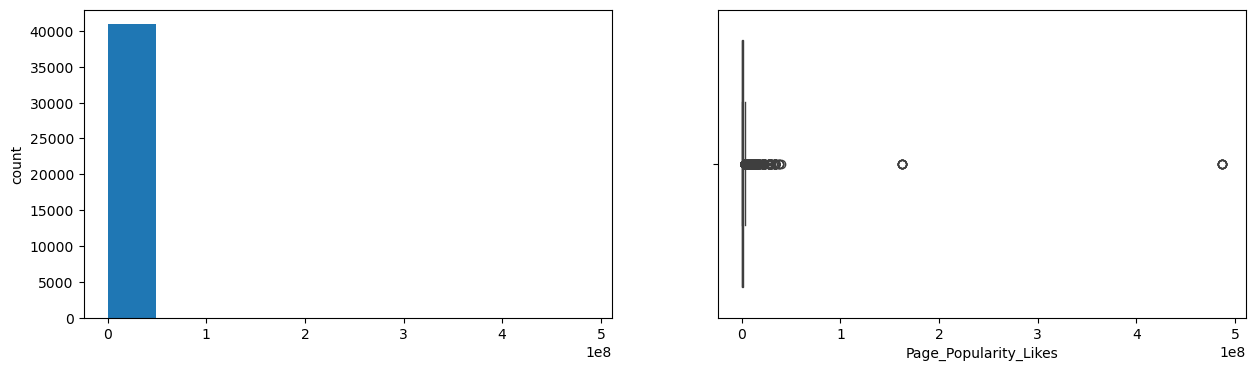

Page_Checkins
Skew : 6.21


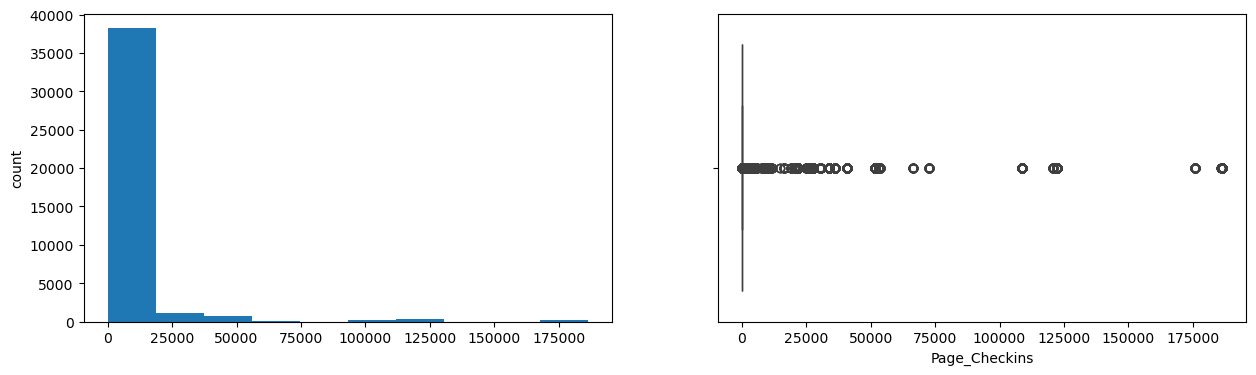

Page_Talking_About
Skew : 14.24


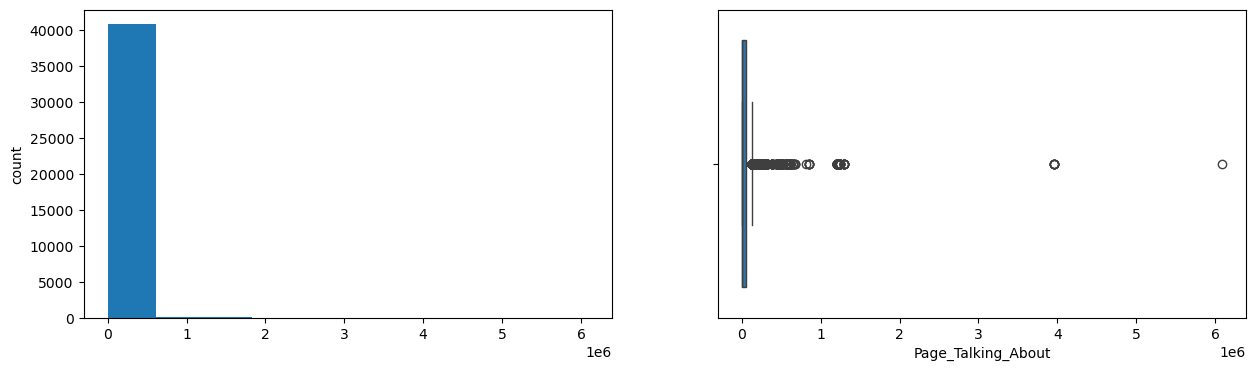

Derived_1
Skew : 63.06


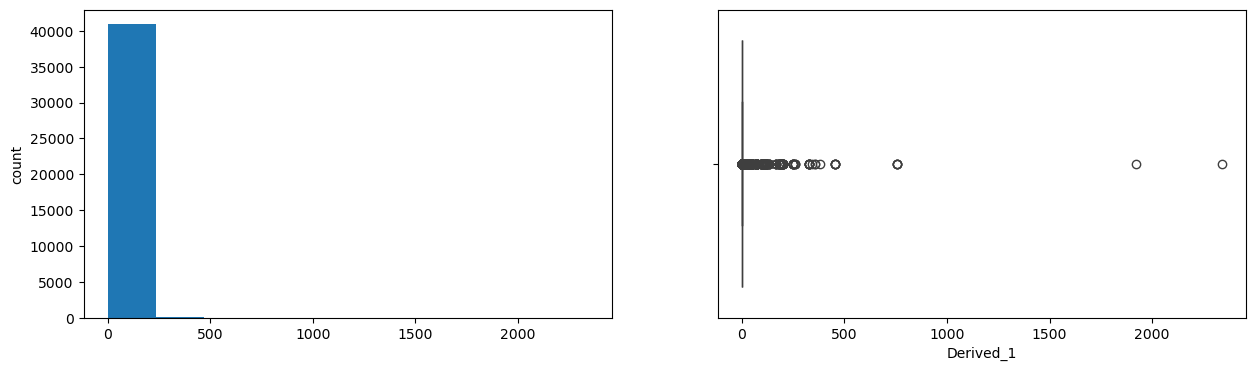

Derived_2
Skew : 1.36


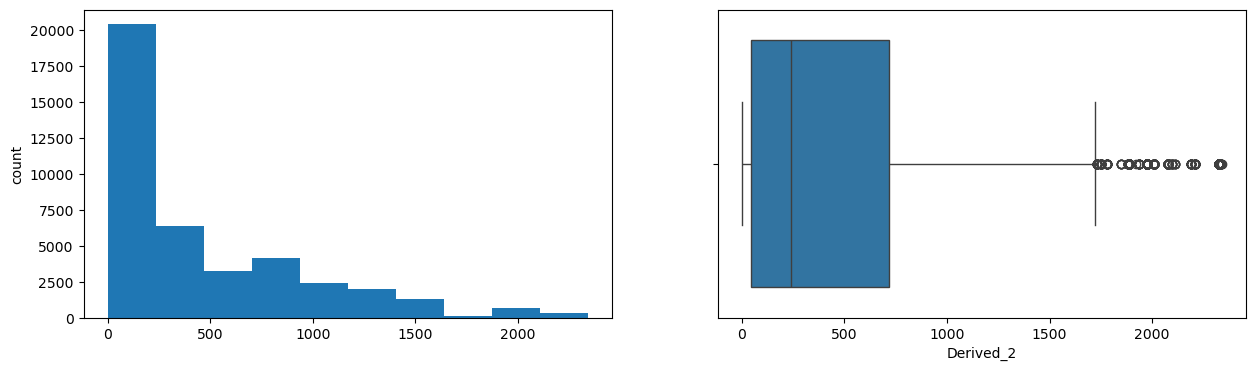

Derived_3
Skew : 4.73


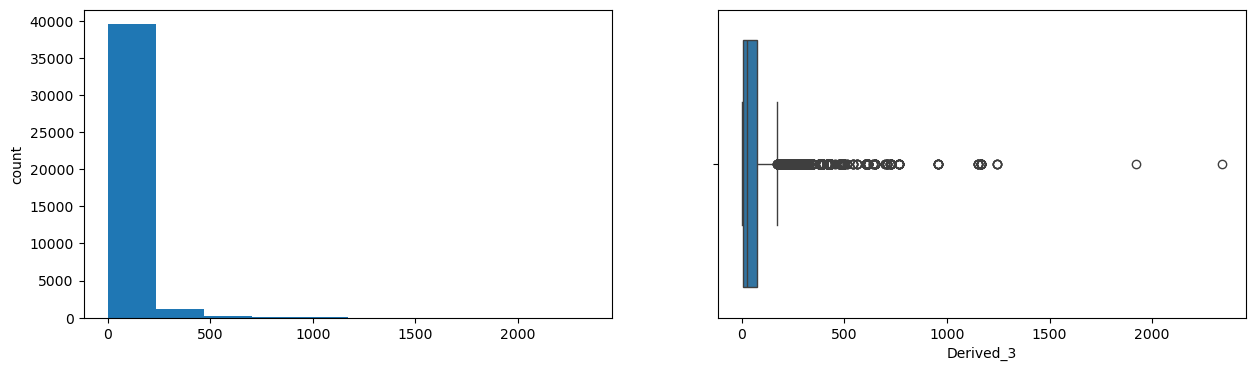

Derived_4
Skew : 7.51


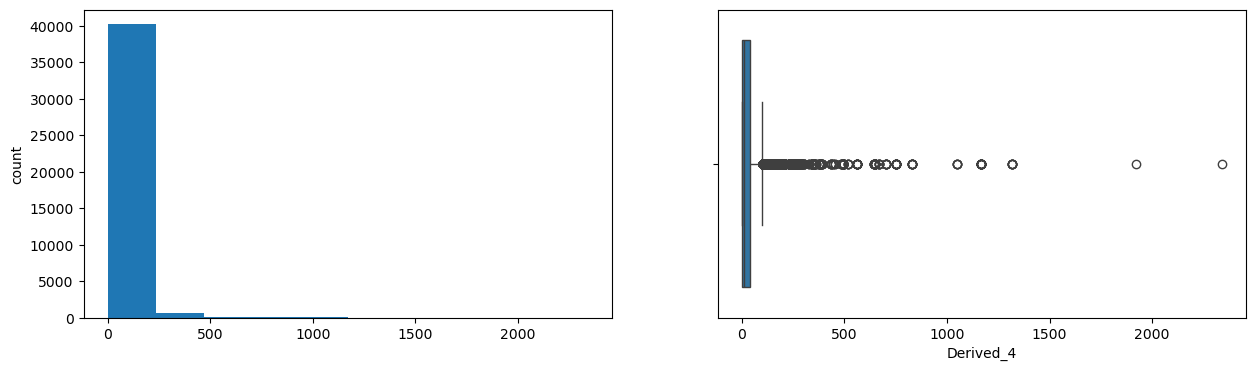

Derived_5
Skew : 2.01


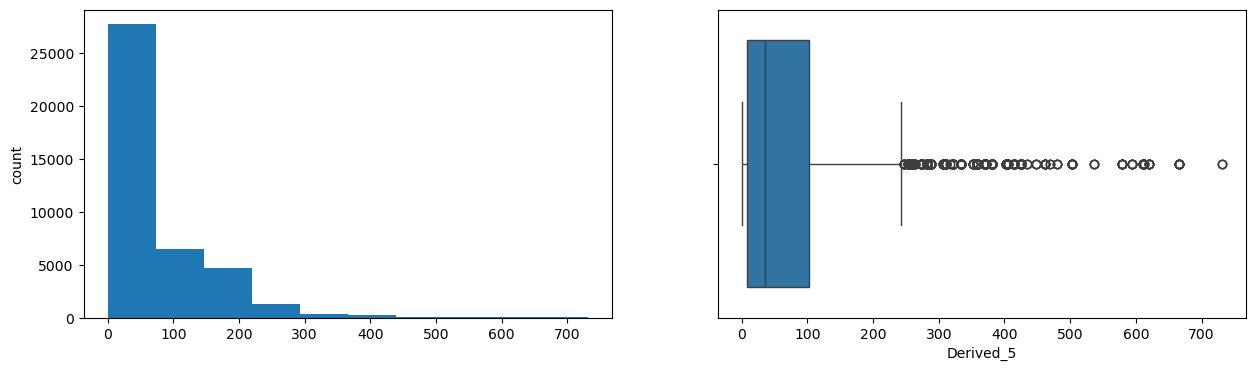

Derived_6
Skew : 172.61


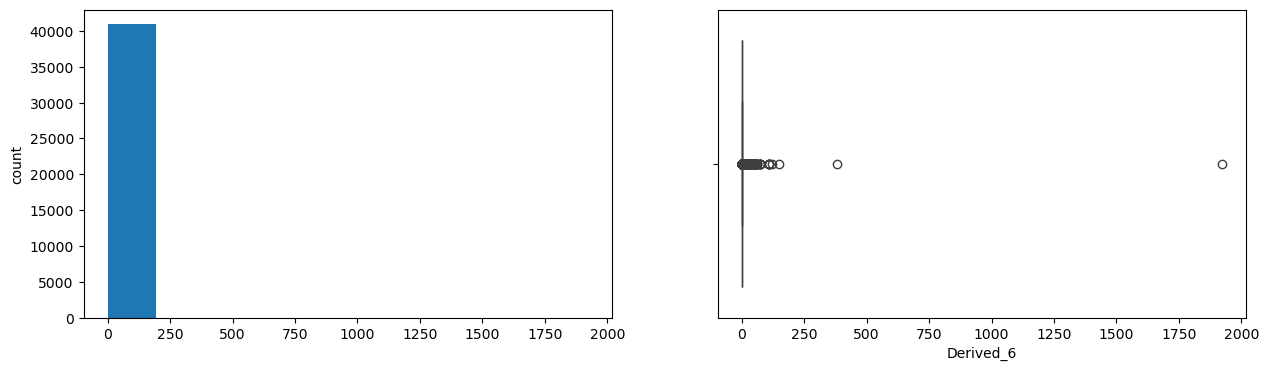

Derived_7
Skew : 1.95


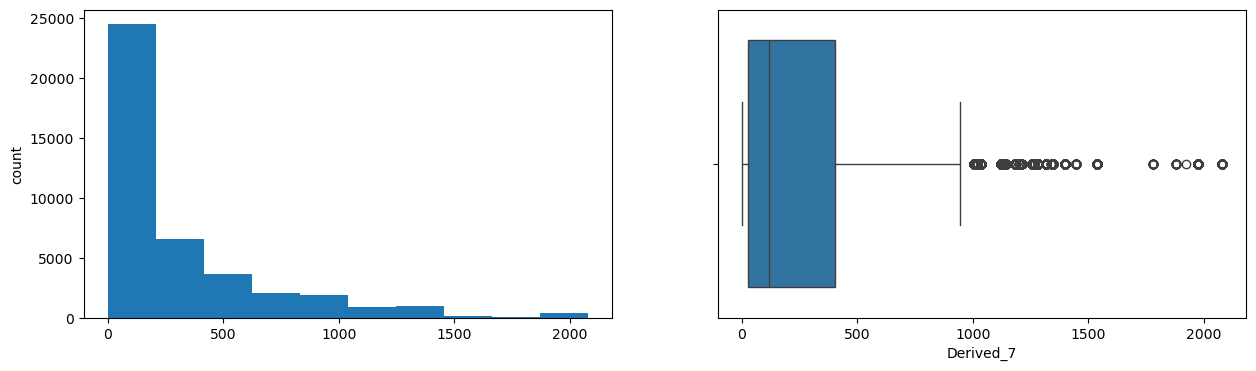

Derived_8
Skew : 7.33


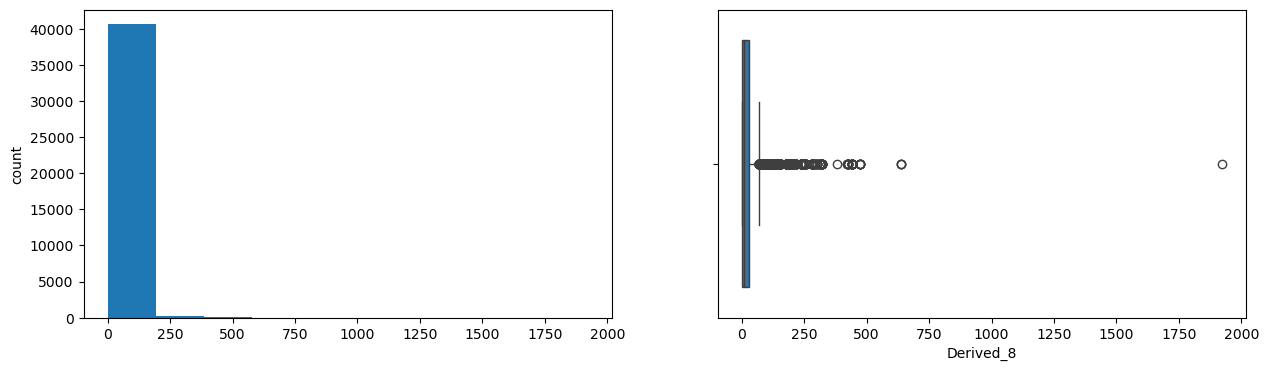

Derived_9
Skew : 25.18


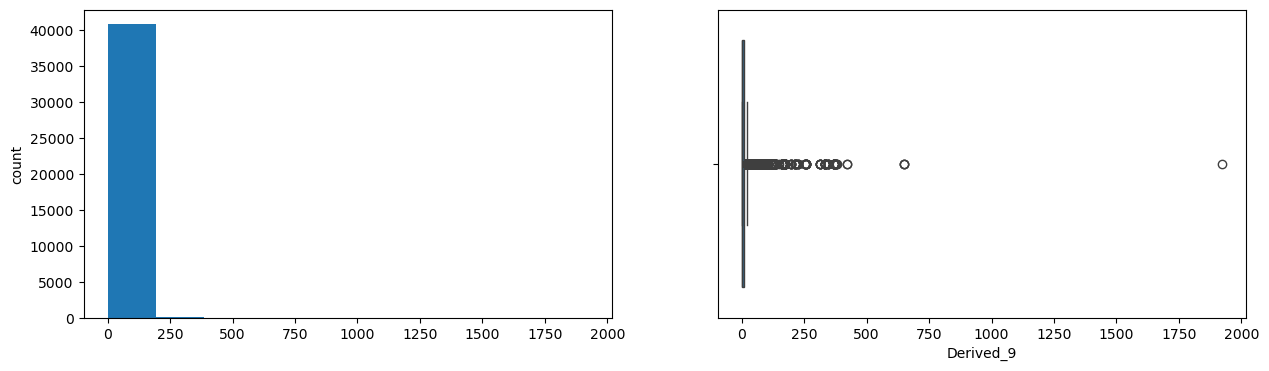

Derived_10
Skew : 2.46


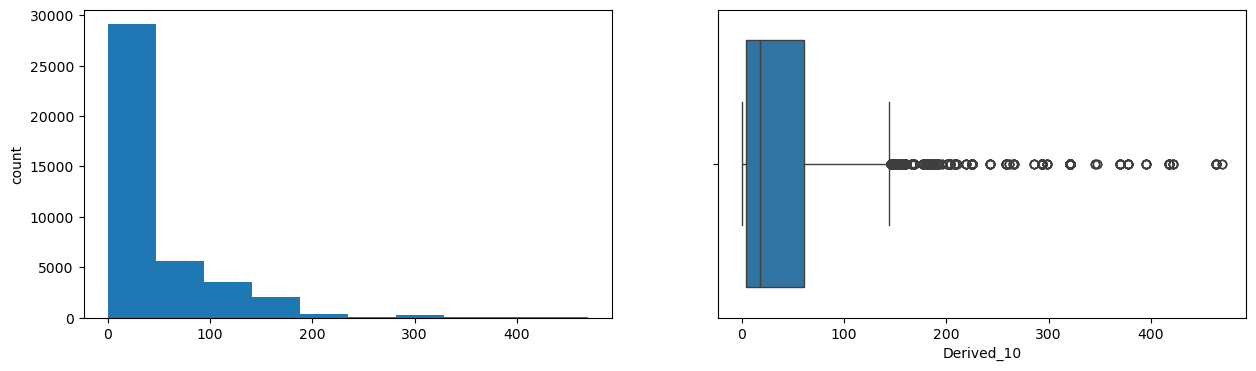

Derived_11
Skew : 131.45


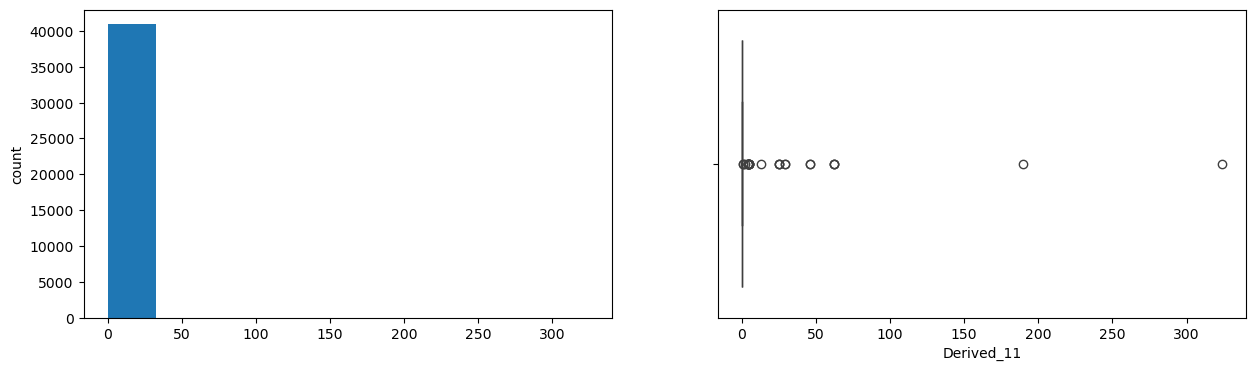

Derived_12
Skew : 1.57


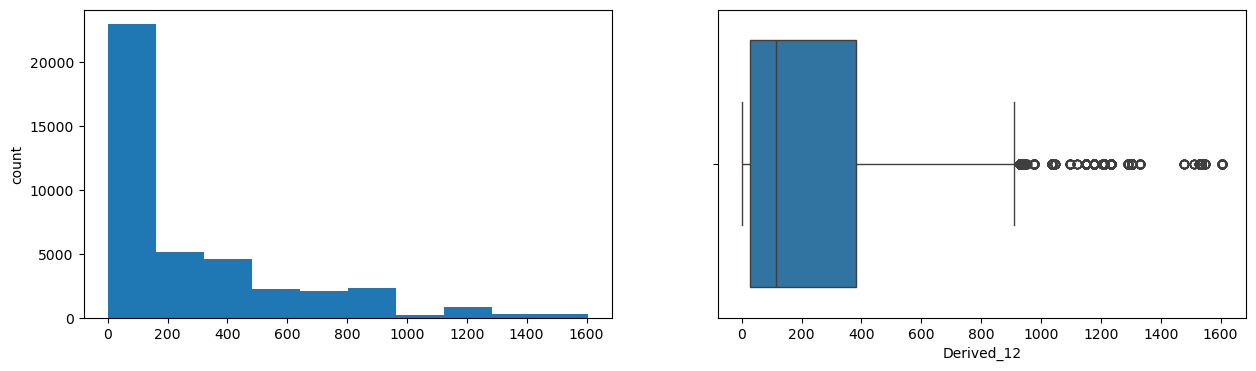

Derived_13
Skew : 4.62


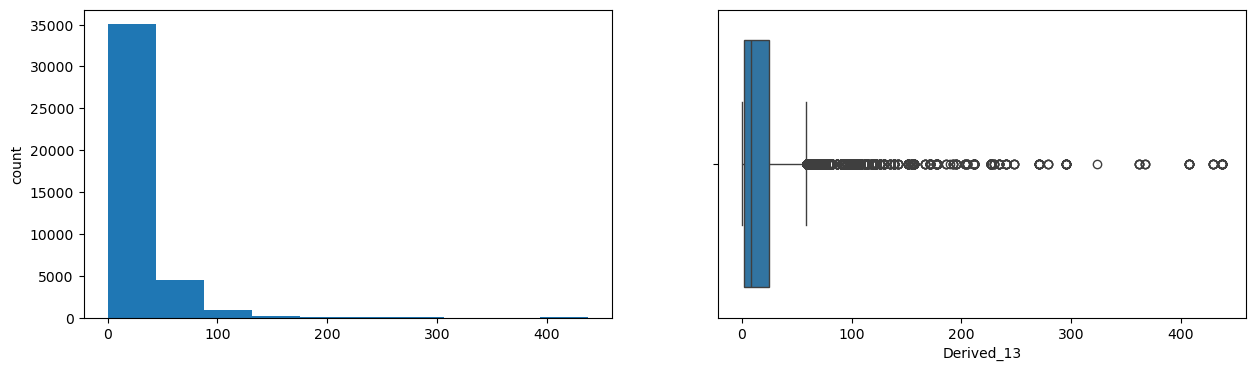

Derived_14
Skew : 13.45


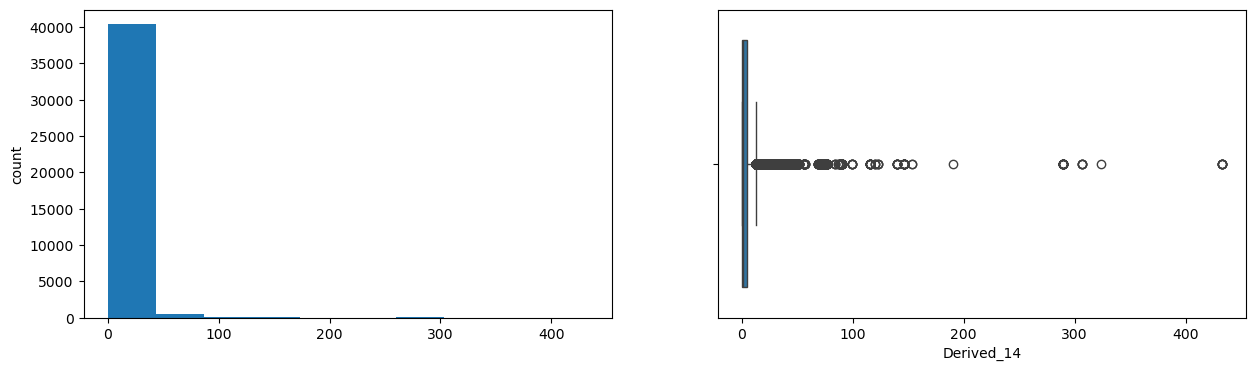

Derived_15
Skew : 2.69


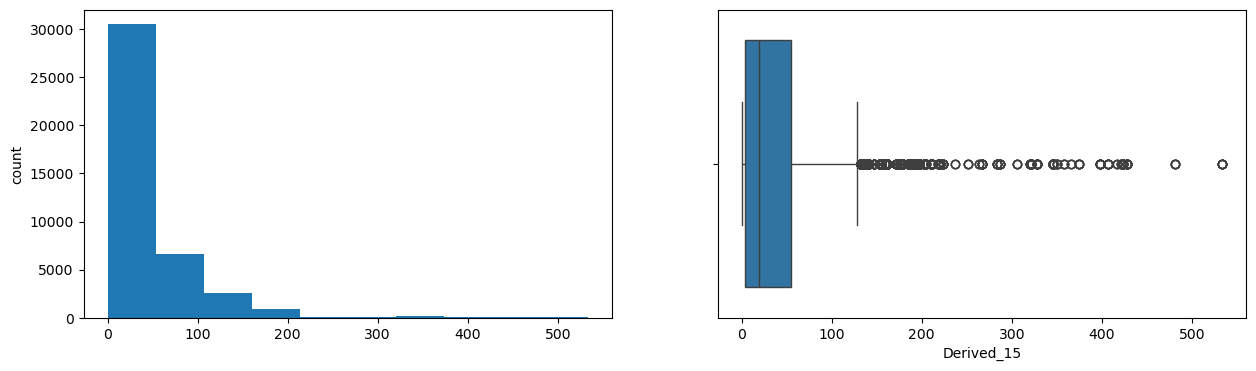

Derived_16
Skew : 59.83


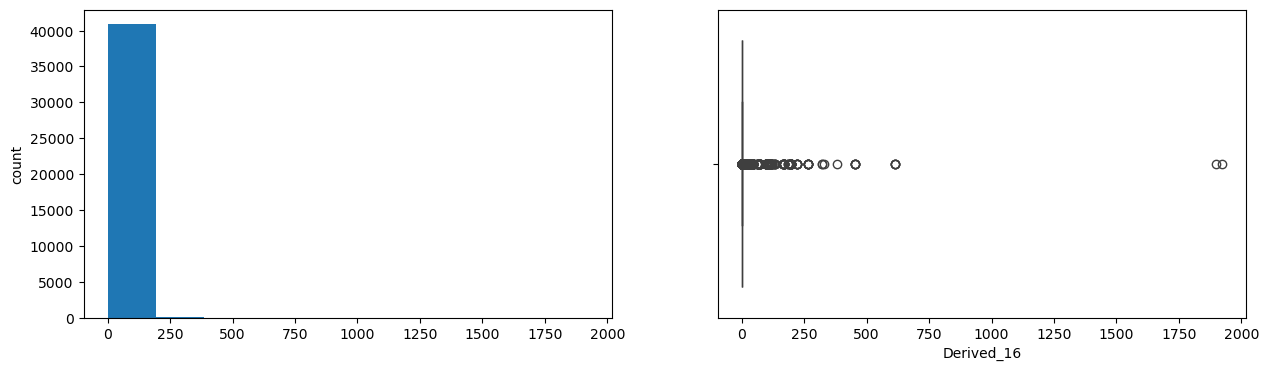

Derived_17
Skew : 1.41


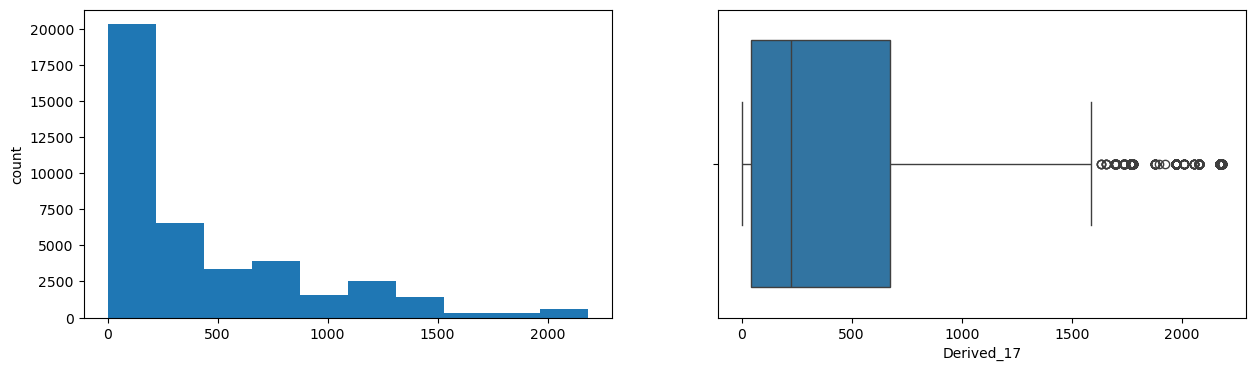

Derived_18
Skew : 4.42


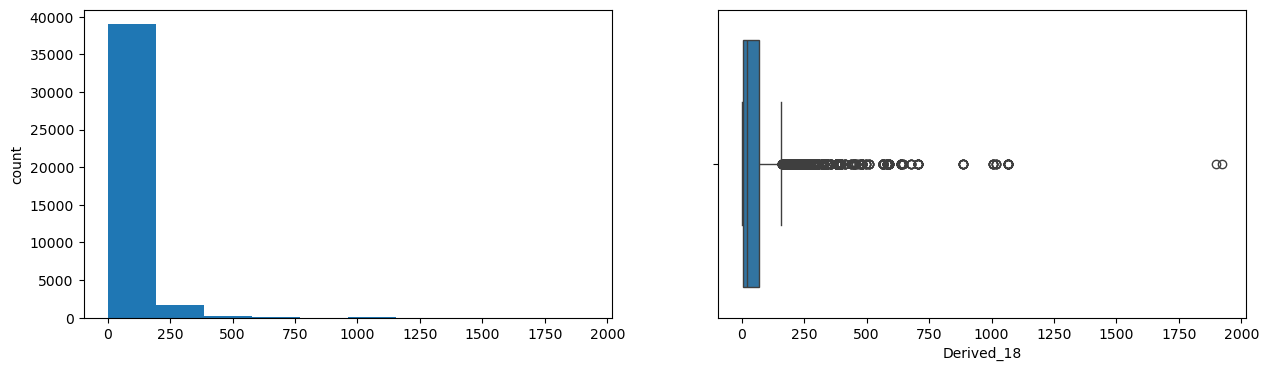

Derived_19
Skew : 7.03


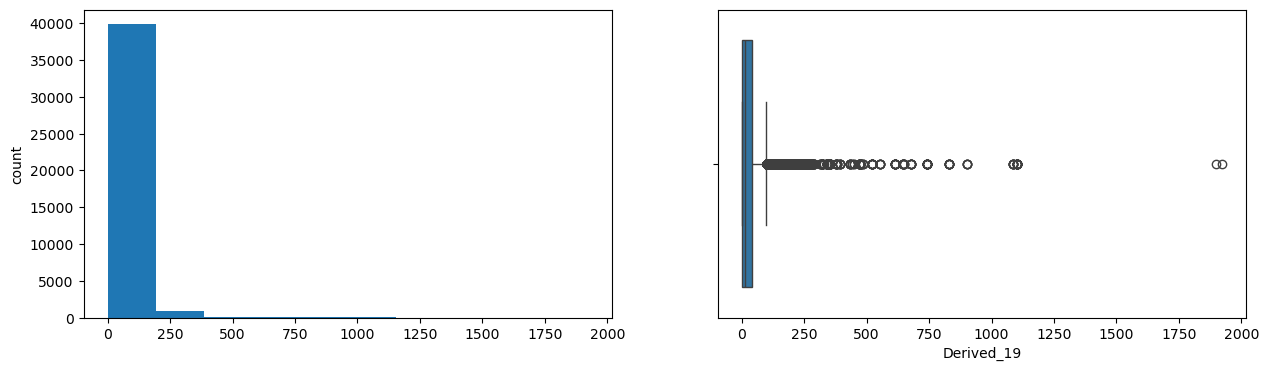

Derived_20
Skew : 1.91


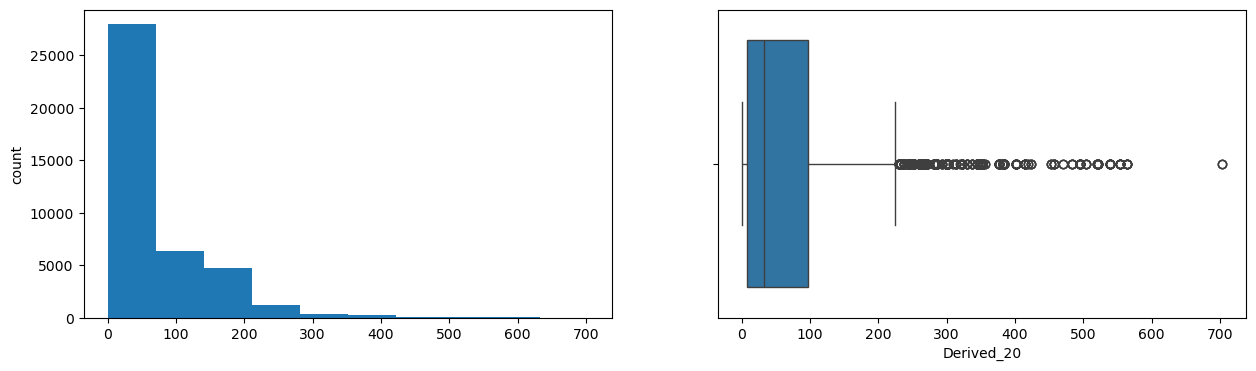

Derived_21
Skew : -1.71


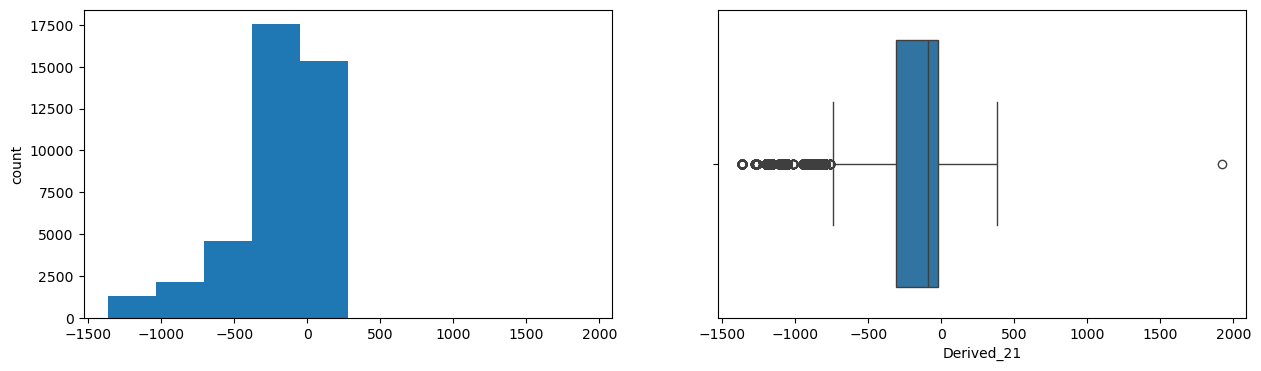

Derived_22
Skew : 2.02


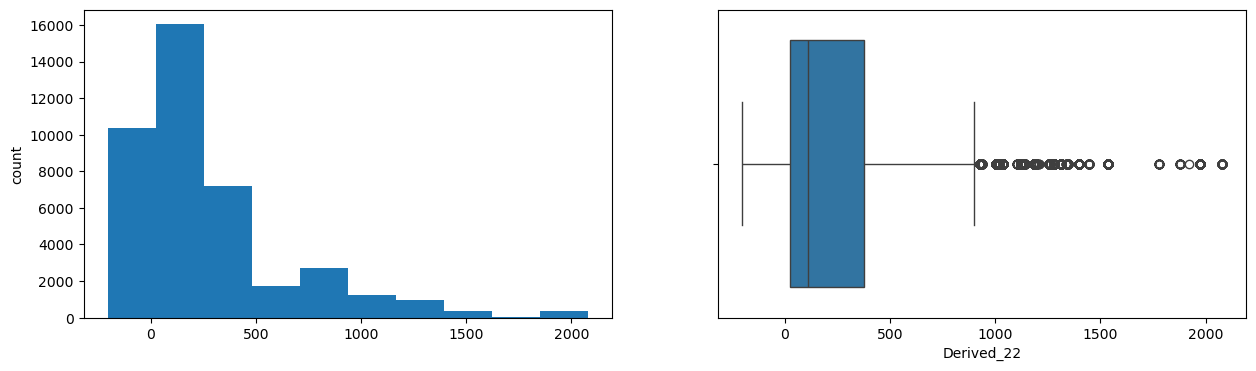

Derived_23
Skew : 37.4


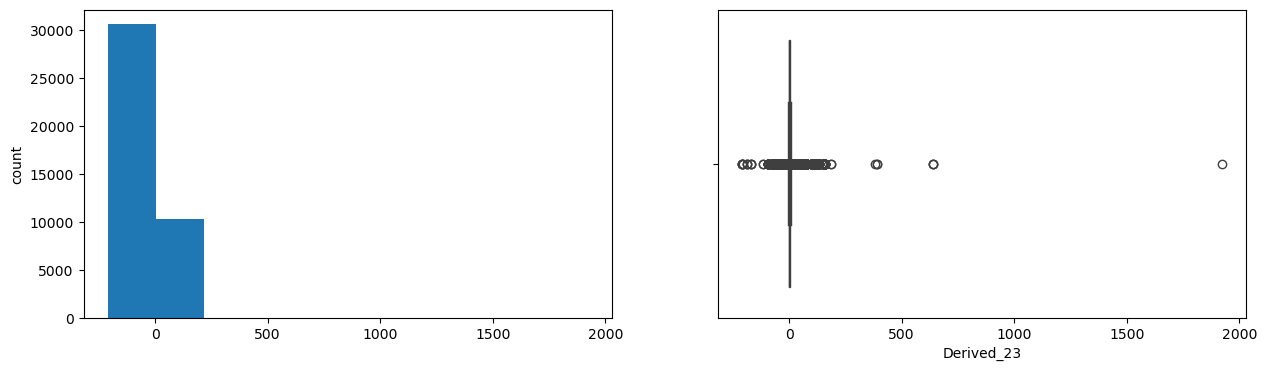

Derived_24
Skew : 61.93


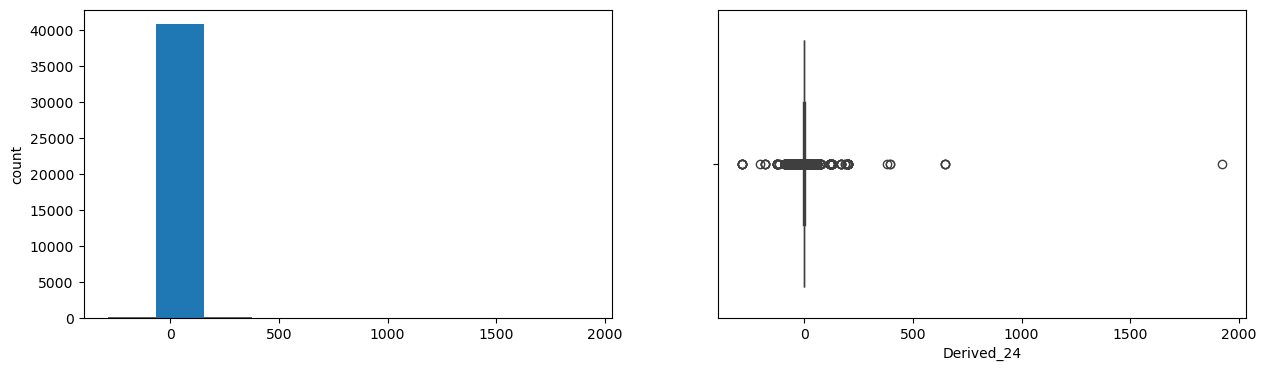

Derived_25
Skew : 2.52


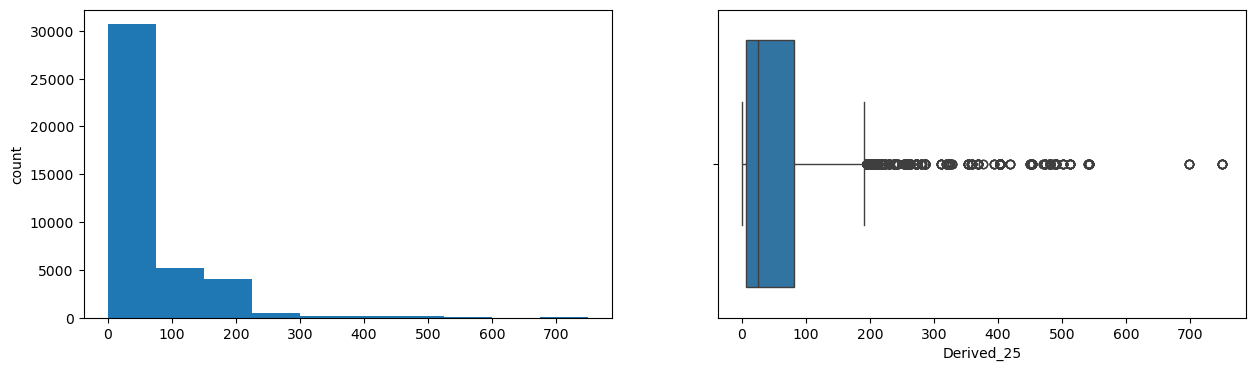

CC1_Total_Comments
Skew : 6.08


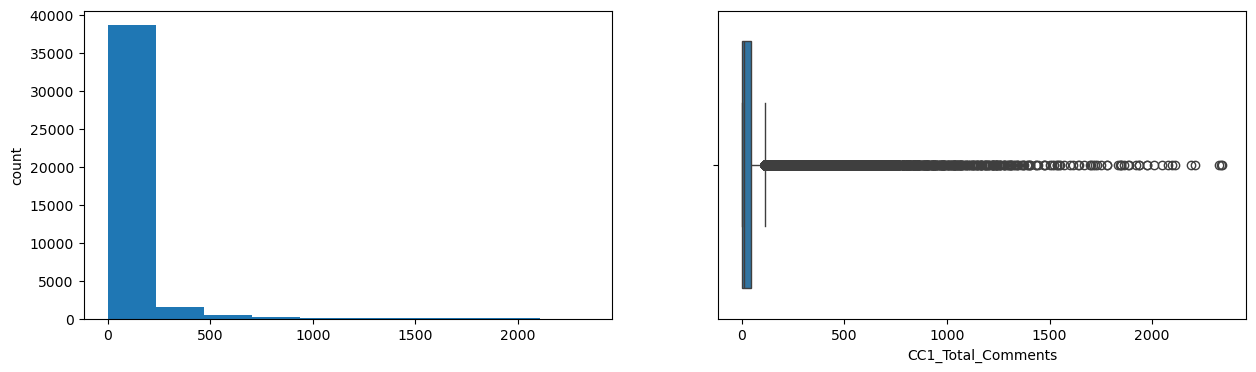

CC2_Comments_Last_24h
Skew : 9.23


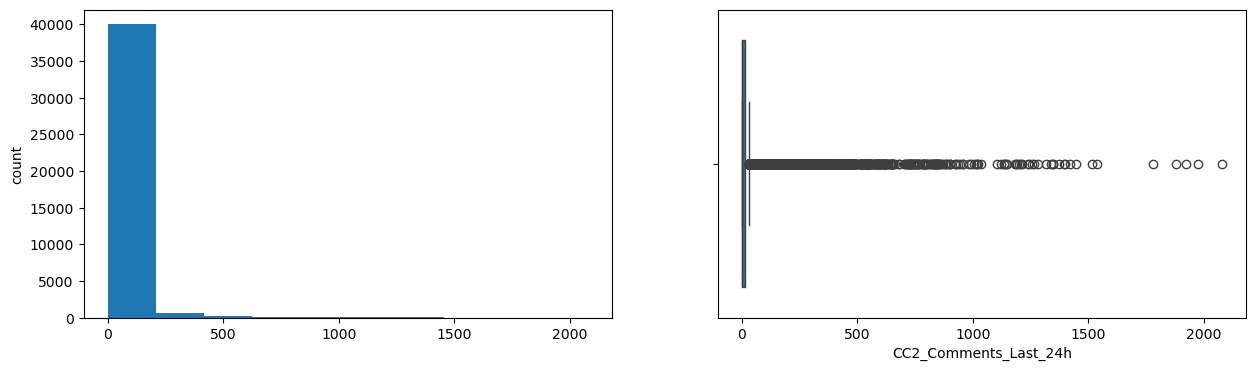

CC3_Comments_48_to_24h
Skew : 8.82


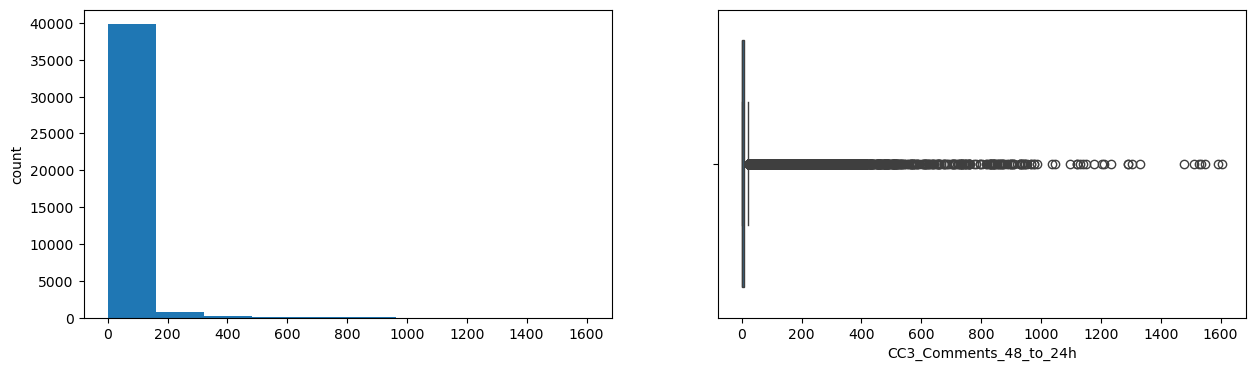

CC4_Comments_First_24h
Skew : 5.94


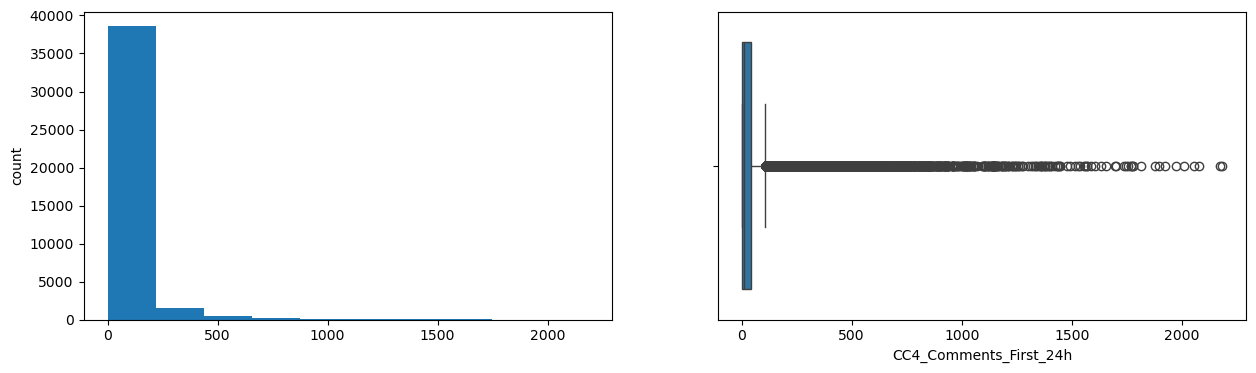

CC5_CC2_CC3_Difference
Skew : 2.86


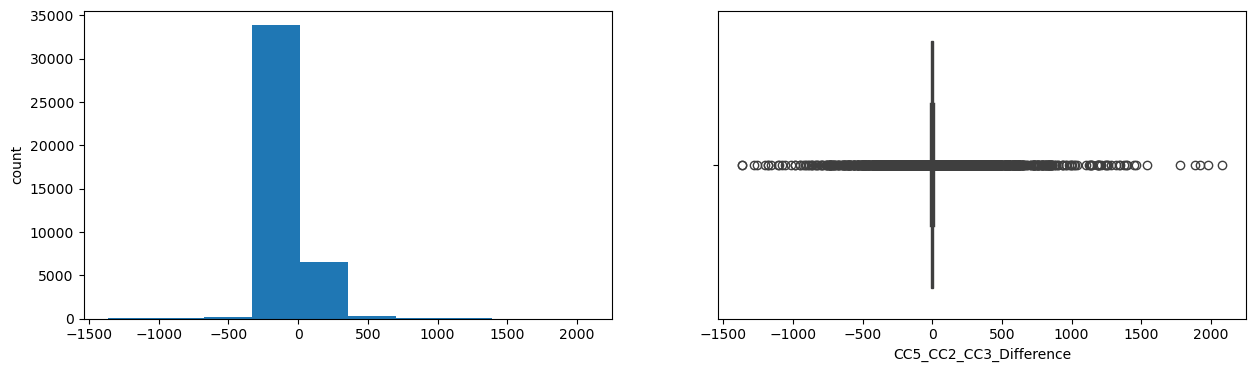

Base_Time
Skew : 0.04


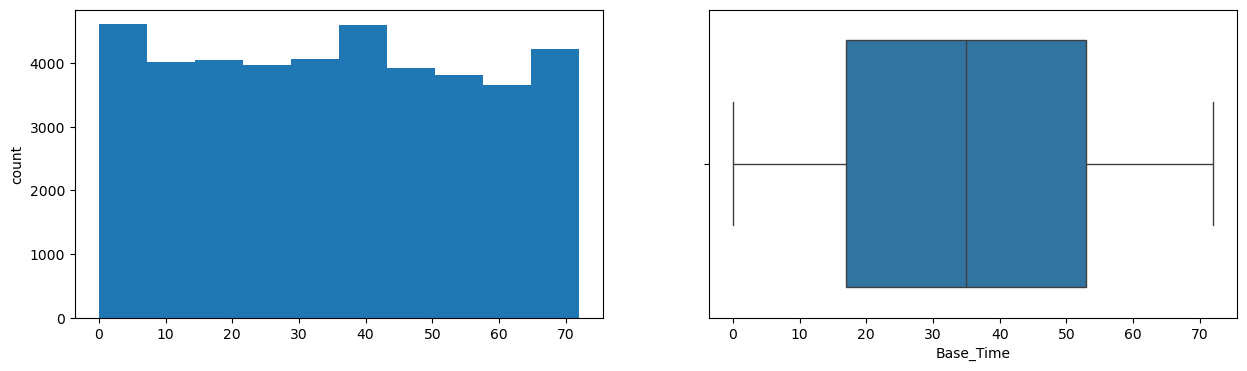

Post_Length
Skew : 19.59


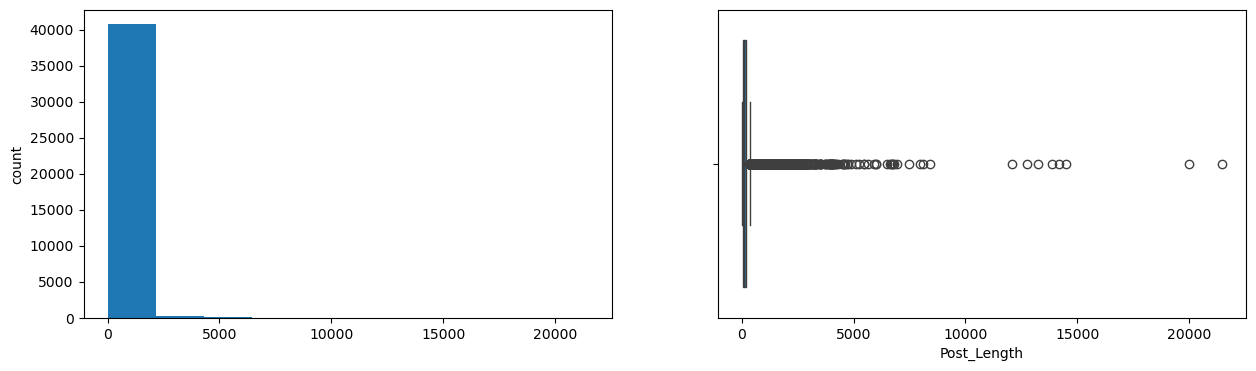

Post_Share_Count
Skew : 103.63


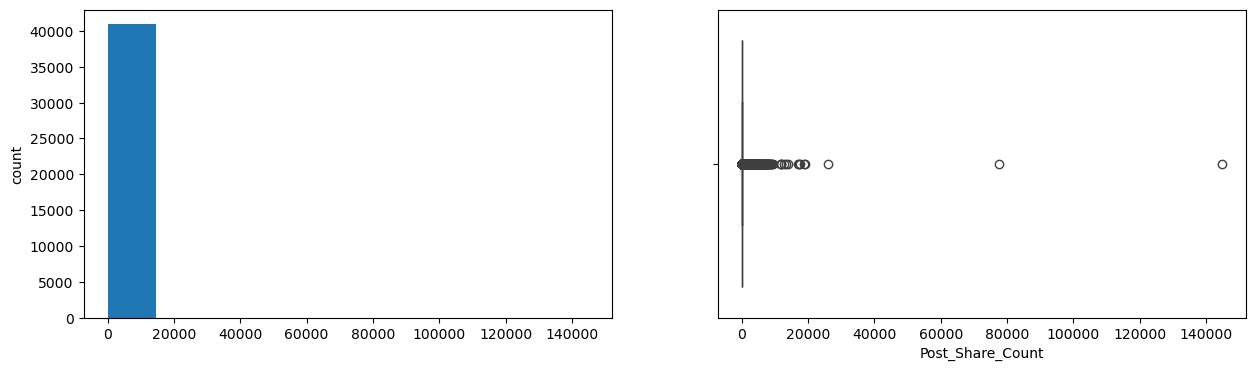

H_Local
Skew : -9.22


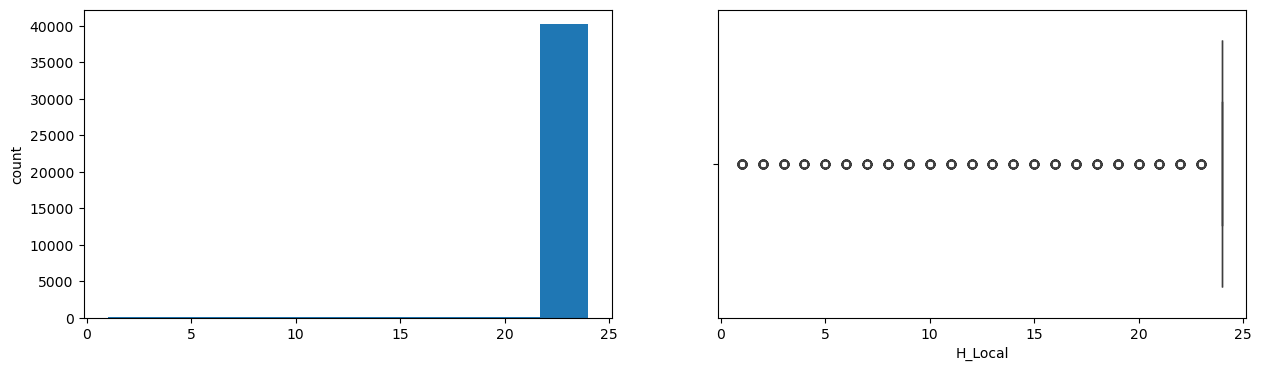

Target_Comment_Volume
Skew : 14.29


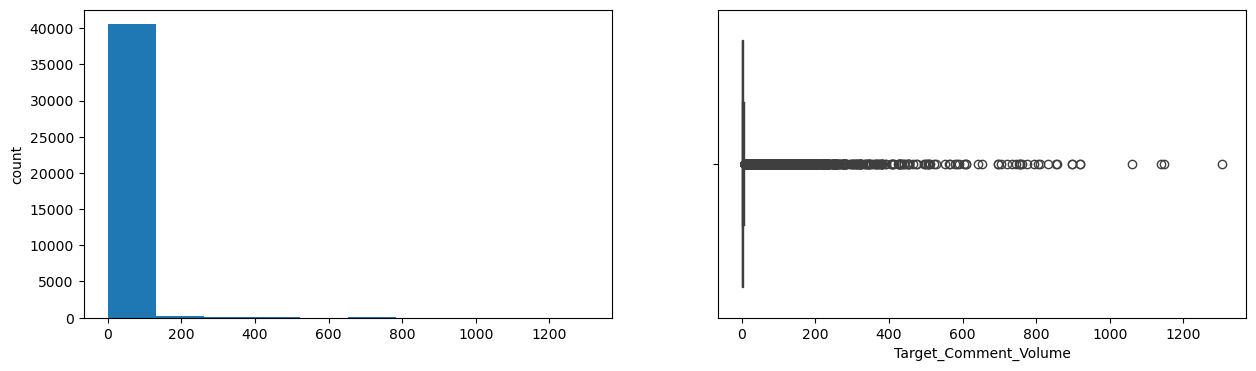

In [14]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

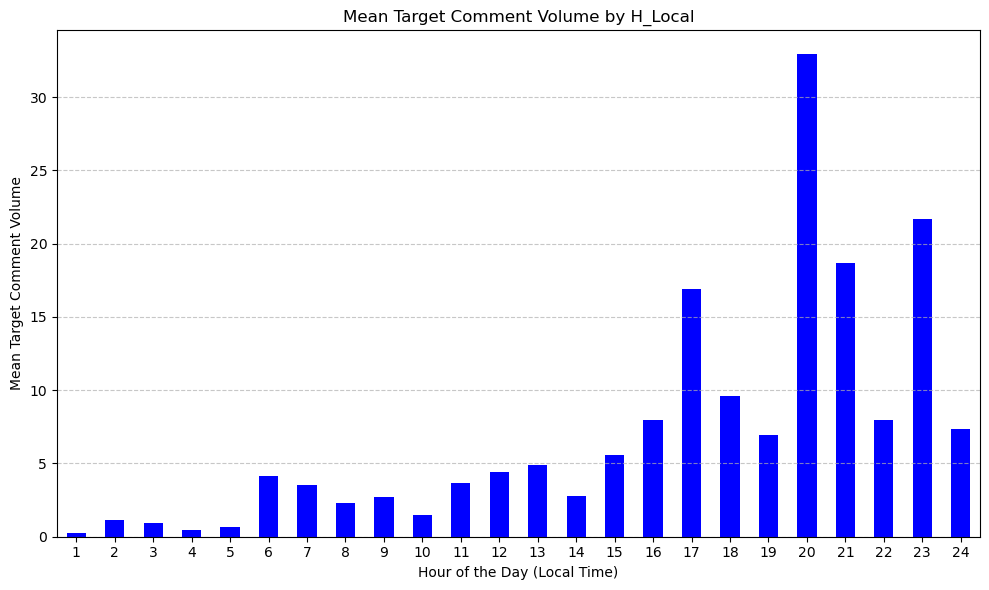

In [15]:
# map out a comparison for specific features
# 1) mean target volume by h_local
# group by 'H_Local' and compute mean of Target_Comment_Volume
mean_volume_by_hlocal = data.groupby('H_Local')['Target_Comment_Volume'].mean().sort_index()

plt.figure(figsize=(10, 6))
mean_volume_by_hlocal.plot(kind='bar', color='blue')
plt.title('Mean Target Comment Volume by H_Local')
plt.xlabel('Hour of the Day (Local Time)')
plt.ylabel('Mean Target Comment Volume')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()  # this tells us that as time goes on, the number of comments increases

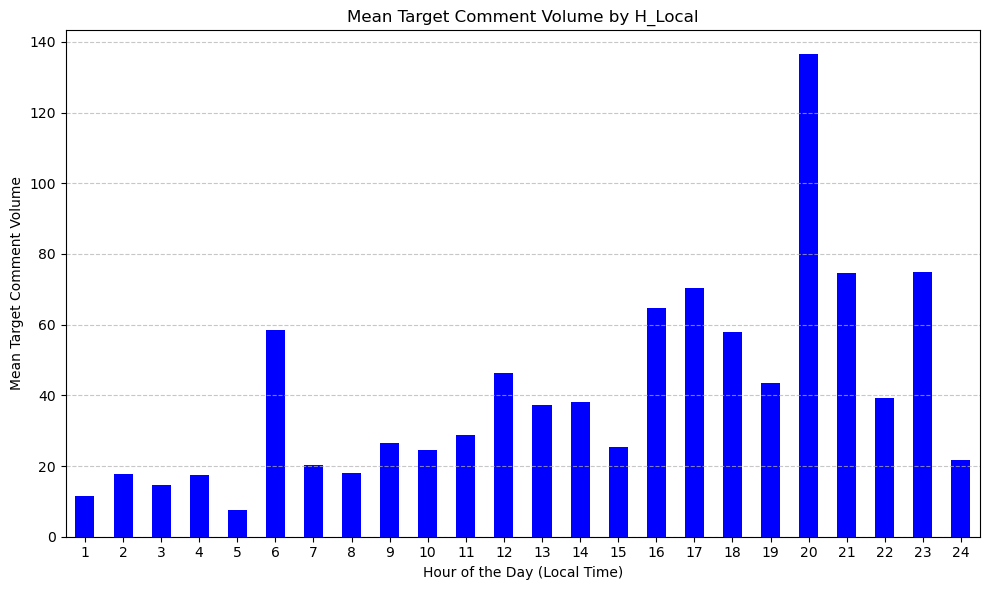

In [16]:
# map out a comparison for specific features
# 2) cc2 (last 24 hrs comment count) by h_local
# group by 'H_Local' and compute mean of Target_Comment_Volume
mean_volume_by_hlocal = data.groupby('H_Local')['CC2_Comments_Last_24h'].mean().sort_index()

plt.figure(figsize=(10, 6))
mean_volume_by_hlocal.plot(kind='bar', color='blue')
plt.title('Mean Target Comment Volume by H_Local')
plt.xlabel('Hour of the Day (Local Time)')
plt.ylabel('Mean Target Comment Volume')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()  # this tells us that as time goes on, the number of comments increases


Column: Page_Category


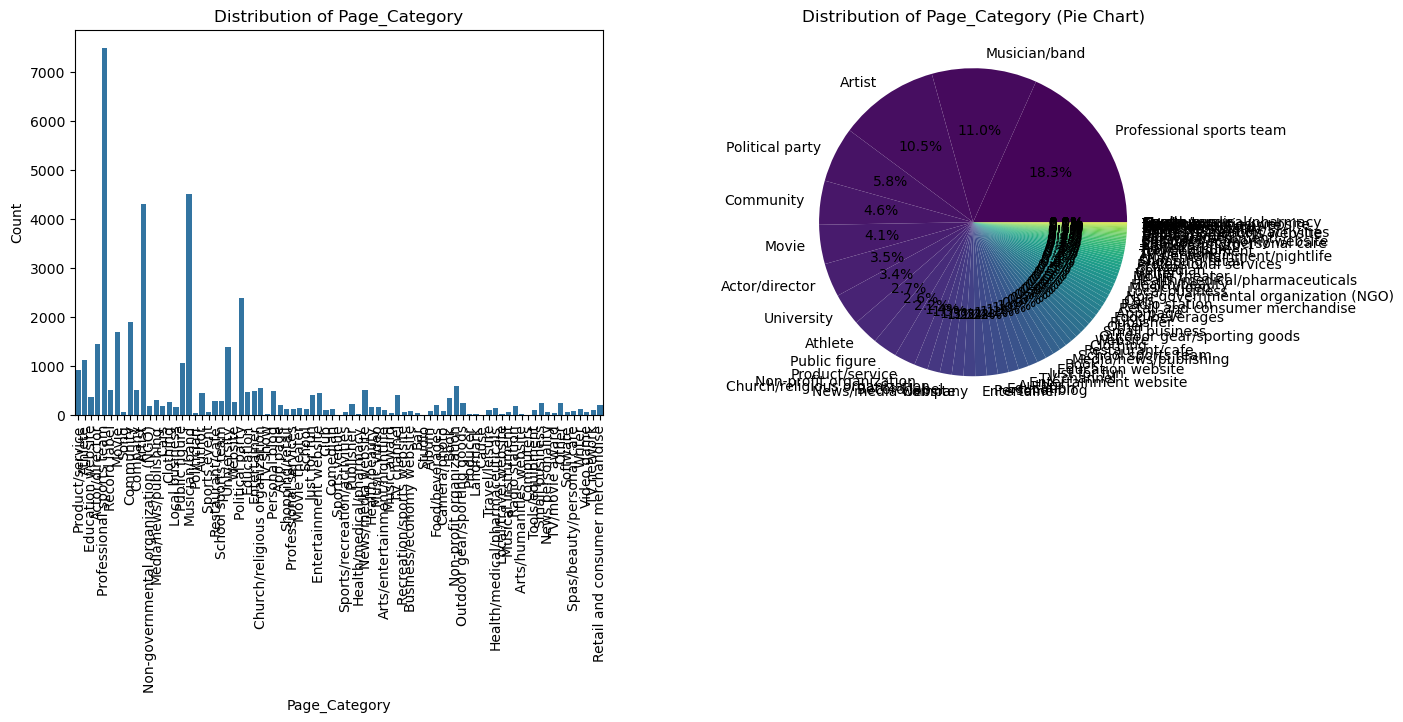


Column: Post_Promotion_Status


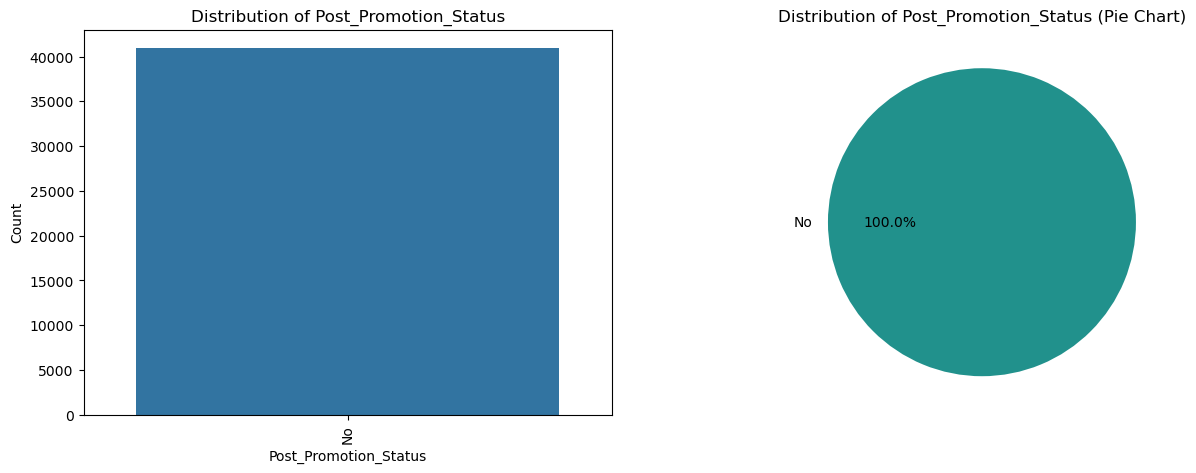


Column: Published_Day


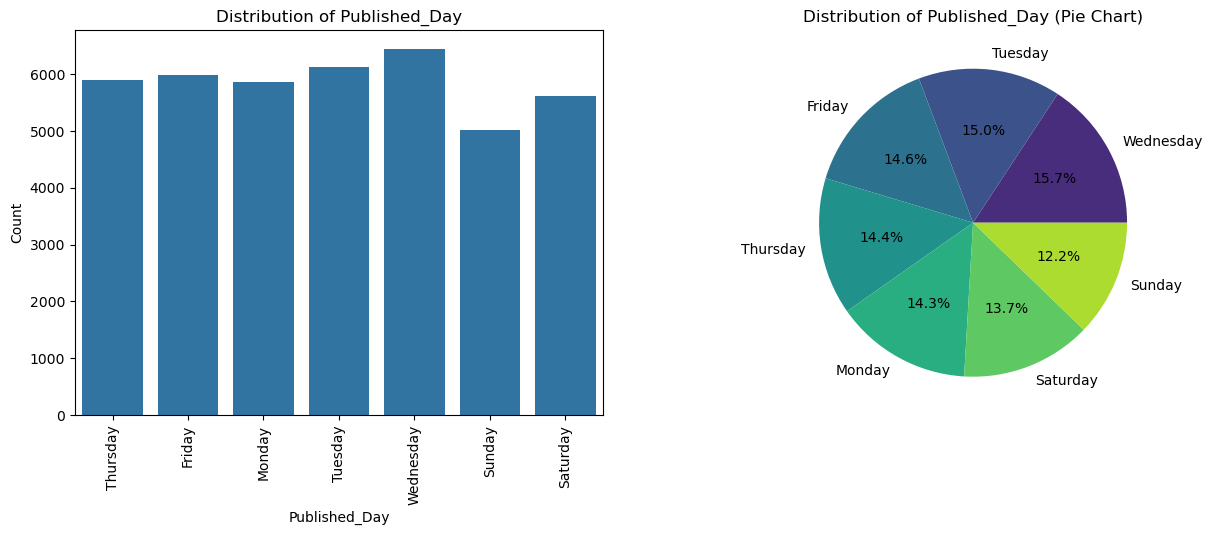


Column: BaseDate_Day


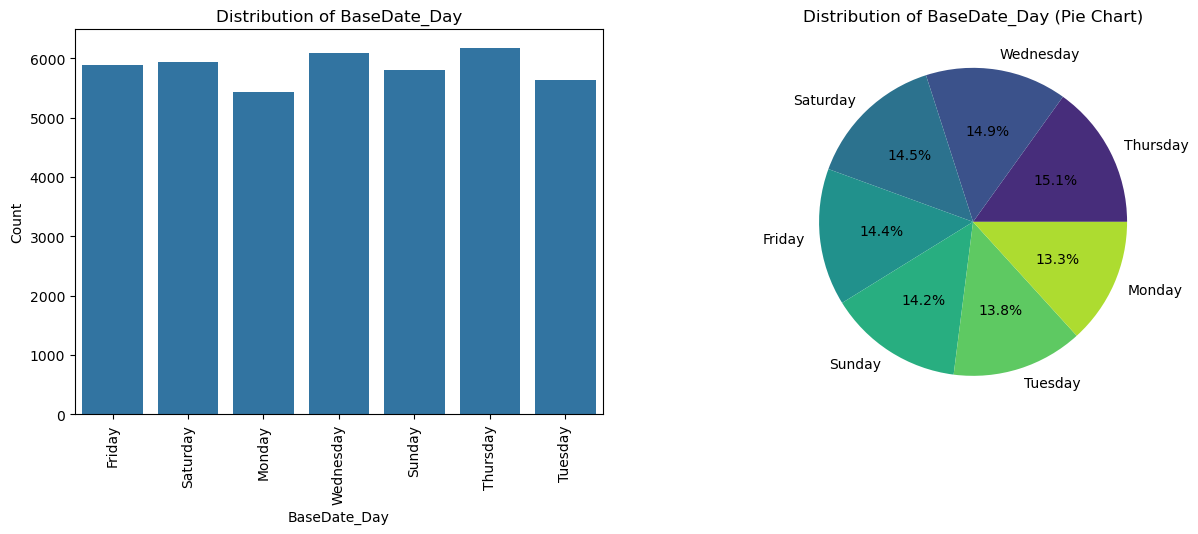

In [17]:
for col in cat_cols:
    print(f"\nColumn: {col}")
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    sns.countplot(x=data[col])
    plt.xticks(rotation=90)
    plt.title(f"Distribution of {col}")
    plt.ylabel('Count')
    plt.xlabel(col)

    plt.subplot(1, 2, 2)
    data[col].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("viridis", len(data[col].unique())))
    plt.title(f"Distribution of {col} (Pie Chart)")
    plt.ylabel('')  
    plt.show()

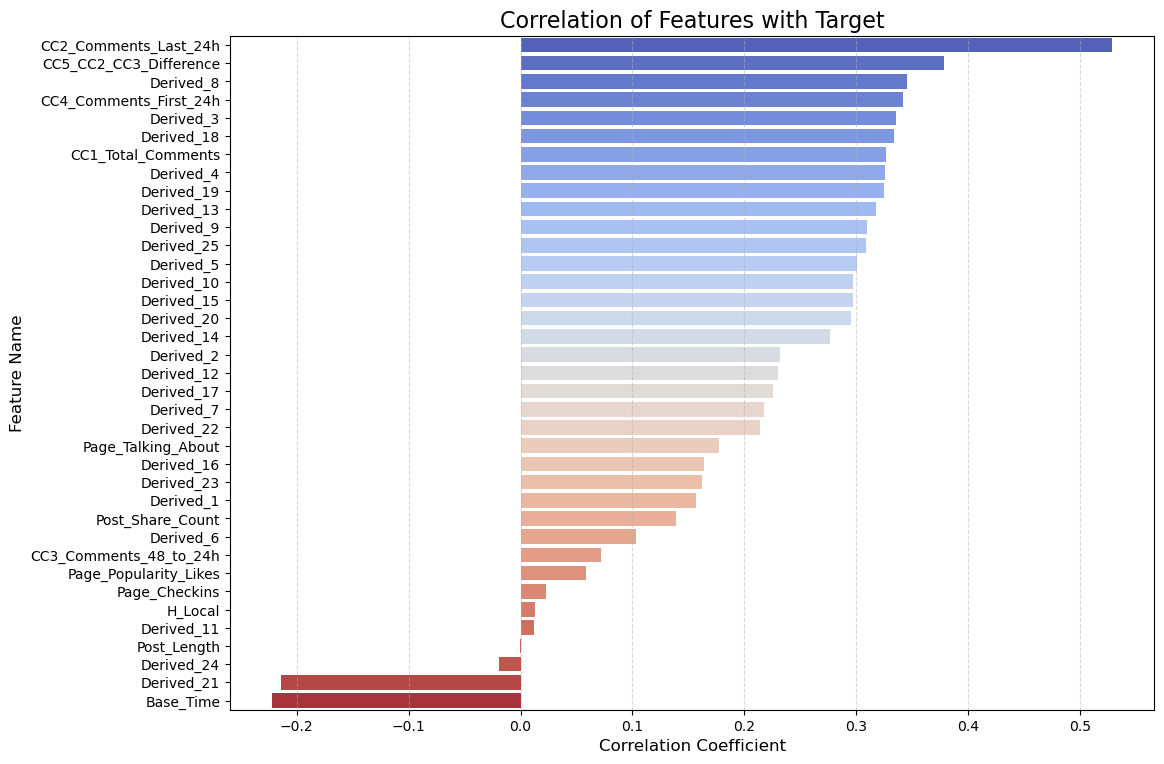

In [18]:
# Correlation calculation
numeric_df = data.select_dtypes(include=[np.number])
correlations = numeric_df.corr()["Target_Comment_Volume"].drop("Target_Comment_Volume").sort_values(ascending=False)

# Convert to DataFrame
corr_df = correlations.reset_index()
corr_df.columns = ["Feature", "Correlation"]

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=corr_df, x="Correlation", y="Feature", hue="Feature", dodge=False, palette="coolwarm")

plt.title("Correlation of Features with Target", fontsize=16)
plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout(pad=2)
plt.show()

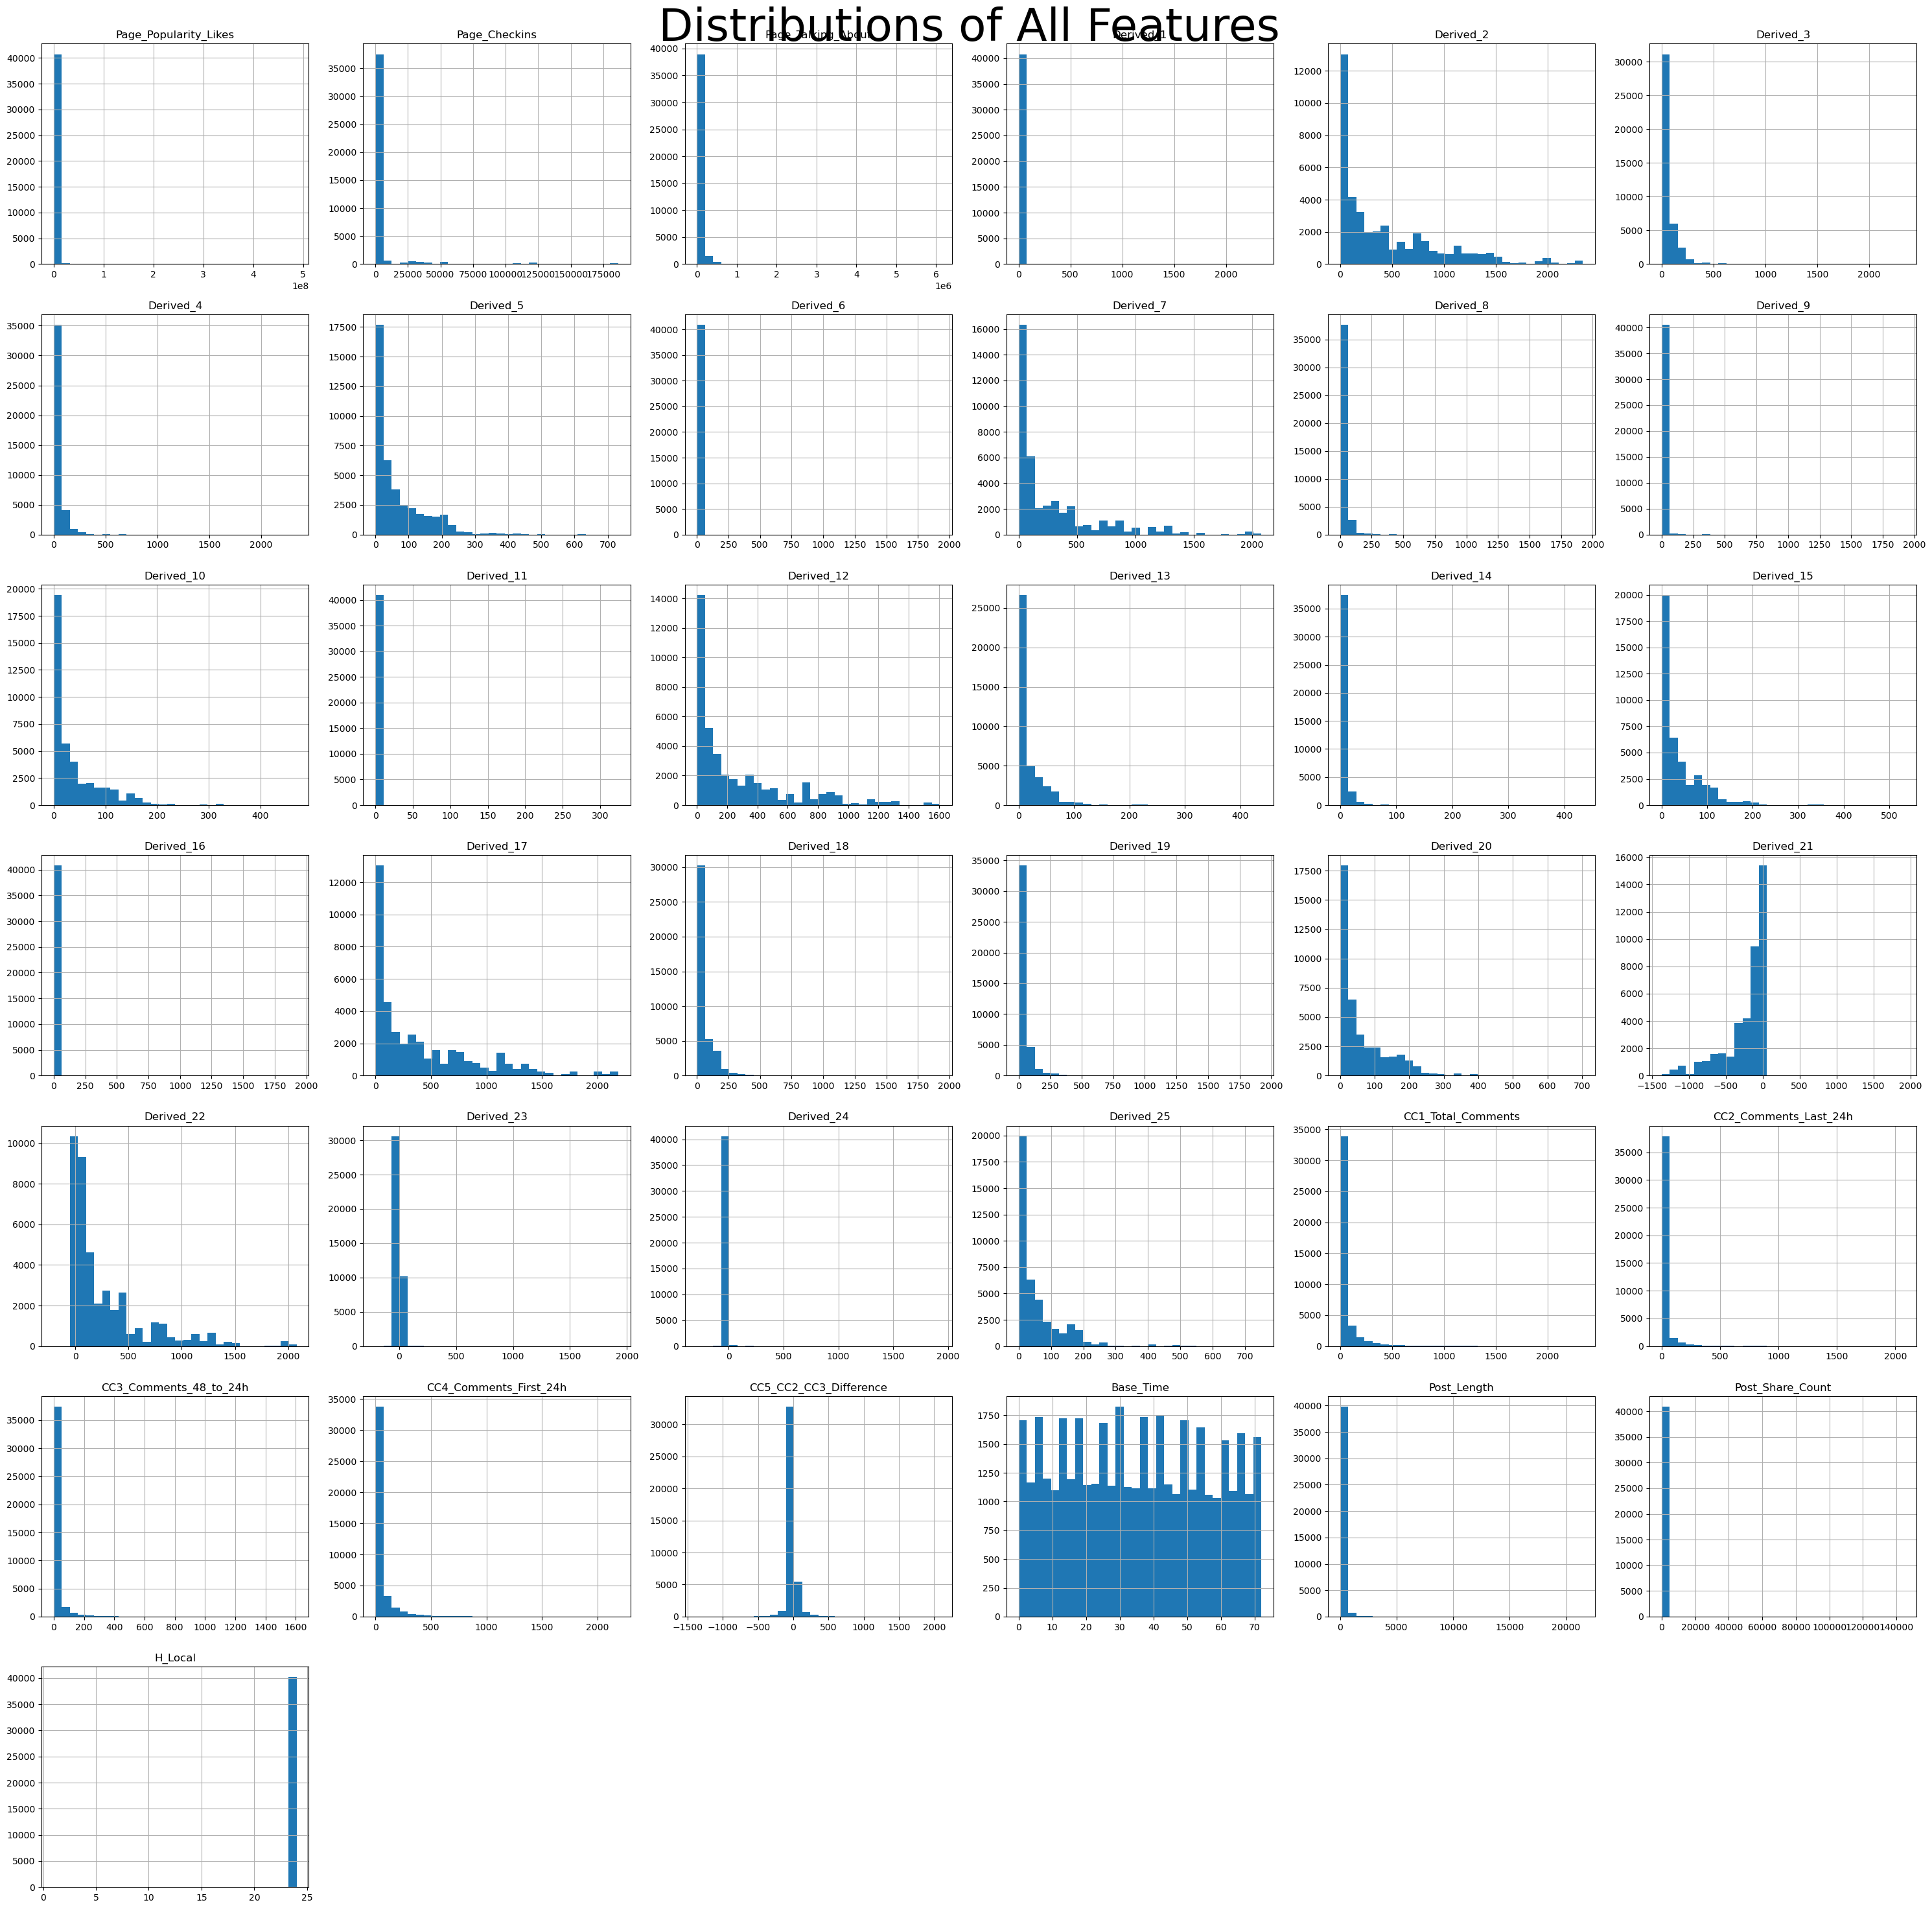

In [19]:
# Remove the target variable (Comment_Count) from the visualization as it will be analyzed separately
data.drop(columns=["Target_Comment_Volume"]).hist(
    bins=30,                # Divide data into 30 equal-width bins
    figsize=(30, 30)       # Create a large figure (30x30 inches) to accommodate all features
)

plt.suptitle("Distributions of All Features", fontsize=50)
plt.tight_layout()
plt.show()

In [20]:
num_cols = data.select_dtypes(include=np.number)
num_correlations = num_cols.corrwith(data["Target_Comment_Volume"])
num_correlations

Page_Popularity_Likes     0.058918
Page_Checkins             0.022981
Page_Talking_About        0.177329
Derived_1                 0.156940
Derived_2                 0.231437
Derived_3                 0.334984
Derived_4                 0.325365
Derived_5                 0.300229
Derived_6                 0.103345
Derived_7                 0.217766
Derived_8                 0.344826
Derived_9                 0.309460
Derived_10                0.297207
Derived_11                0.011900
Derived_12                0.229882
Derived_13                0.317866
Derived_14                0.276431
Derived_15                0.296788
Derived_16                0.164300
Derived_17                0.225914
Derived_18                0.333989
Derived_19                0.324371
Derived_20                0.295222
Derived_21               -0.214045
Derived_22                0.213878
Derived_23                0.162492
Derived_24               -0.019503
Derived_25                0.308801
CC1_Total_Comments  

In [21]:
numerical_corr_matrix = num_cols.corr()
numerical_corr_matrix

,Page_Popularity_Likes,Page_Checkins,Page_Talking_About,Derived_1,Derived_2,Derived_3,Derived_4,Derived_5,Derived_6,Derived_7,...,CC1_Total_Comments,CC2_Comments_Last_24h,CC3_Comments_48_to_24h,CC4_Comments_First_24h,CC5_CC2_CC3_Difference,Base_Time,Post_Length,Post_Share_Count,H_Local,Target_Comment_Volume
Page_Popularity_Likes,1.000000,0.044838,0.623436,0.059575,0.158716,0.166424,0.145216,0.174597,0.015750,0.182906,...,0.105623,0.077773,0.071448,0.104063,0.009764,-0.005713,-0.003509,0.331114,-0.021676,0.058918
Page_Checkins,0.044838,1.000000,0.166848,-0.002830,0.169241,0.154965,0.121731,0.178411,-0.003997,0.201238,...,0.098350,0.061608,0.064702,0.101212,0.001620,0.004768,-0.005189,0.052569,-0.014527,0.022981
Page_Talking_About,0.623436,0.166848,1.000000,0.181431,0.482027,0.518602,0.455485,0.541043,0.059709,0.509272,...,0.329137,0.251527,0.217937,0.329396,0.041487,-0.024578,-0.011251,0.443296,-0.107346,0.177329
Derived_1,0.059575,-0.002830,0.181431,1.000000,0.127578,0.474401,0.551732,0.202030,0.610646,0.087507,...,0.301085,0.212254,0.156582,0.289571,0.055628,0.003993,-0.010387,0.052372,-0.046697,0.156940
Derived_2,0.158716,0.169241,0.482027,0.127578,1.000000,0.706991,0.574632,0.895088,0.045731,0.851274,...,0.448703,0.321795,0.303869,0.452099,0.034178,-0.012282,0.007127,0.127578,-0.056577,0.231437
Derived_3,0.166424,0.154965,0.518602,0.474401,0.706991,1.000000,0.963965,0.894528,0.222305,0.661041,...,0.634662,0.455030,0.420782,0.633358,0.055044,-0.009081,-0.003967,0.149472,-0.076799,0.334984
Derived_4,0.145216,0.121731,0.455485,0.551732,0.574632,0.963965,1.000000,0.765475,0.266496,0.525825,...,0.611792,0.435414,0.403087,0.608509,0.052335,-0.004930,-0.012023,0.133098,-0.067239,0.325365
Derived_5,0.174597,0.178411,0.541043,0.202030,0.895088,0.894528,0.765475,1.000000,0.062964,0.814345,...,0.567724,0.410277,0.386216,0.569896,0.044485,-0.015811,0.004678,0.149004,-0.080926,0.300229
Derived_6,0.015750,-0.003997,0.059709,0.610646,0.045731,0.222305,0.266496,0.062964,1.000000,0.036907,...,0.141089,0.169255,0.046962,0.142800,0.103135,-0.006411,-0.004009,0.016971,-0.021428,0.103345
Derived_7,0.182906,0.201238,0.509272,0.087507,0.851274,0.661041,0.525825,0.814345,0.036907,1.000000,...,0.419541,0.323258,0.268923,0.426521,0.061743,-0.018905,0.008893,0.133686,-0.062032,0.217766


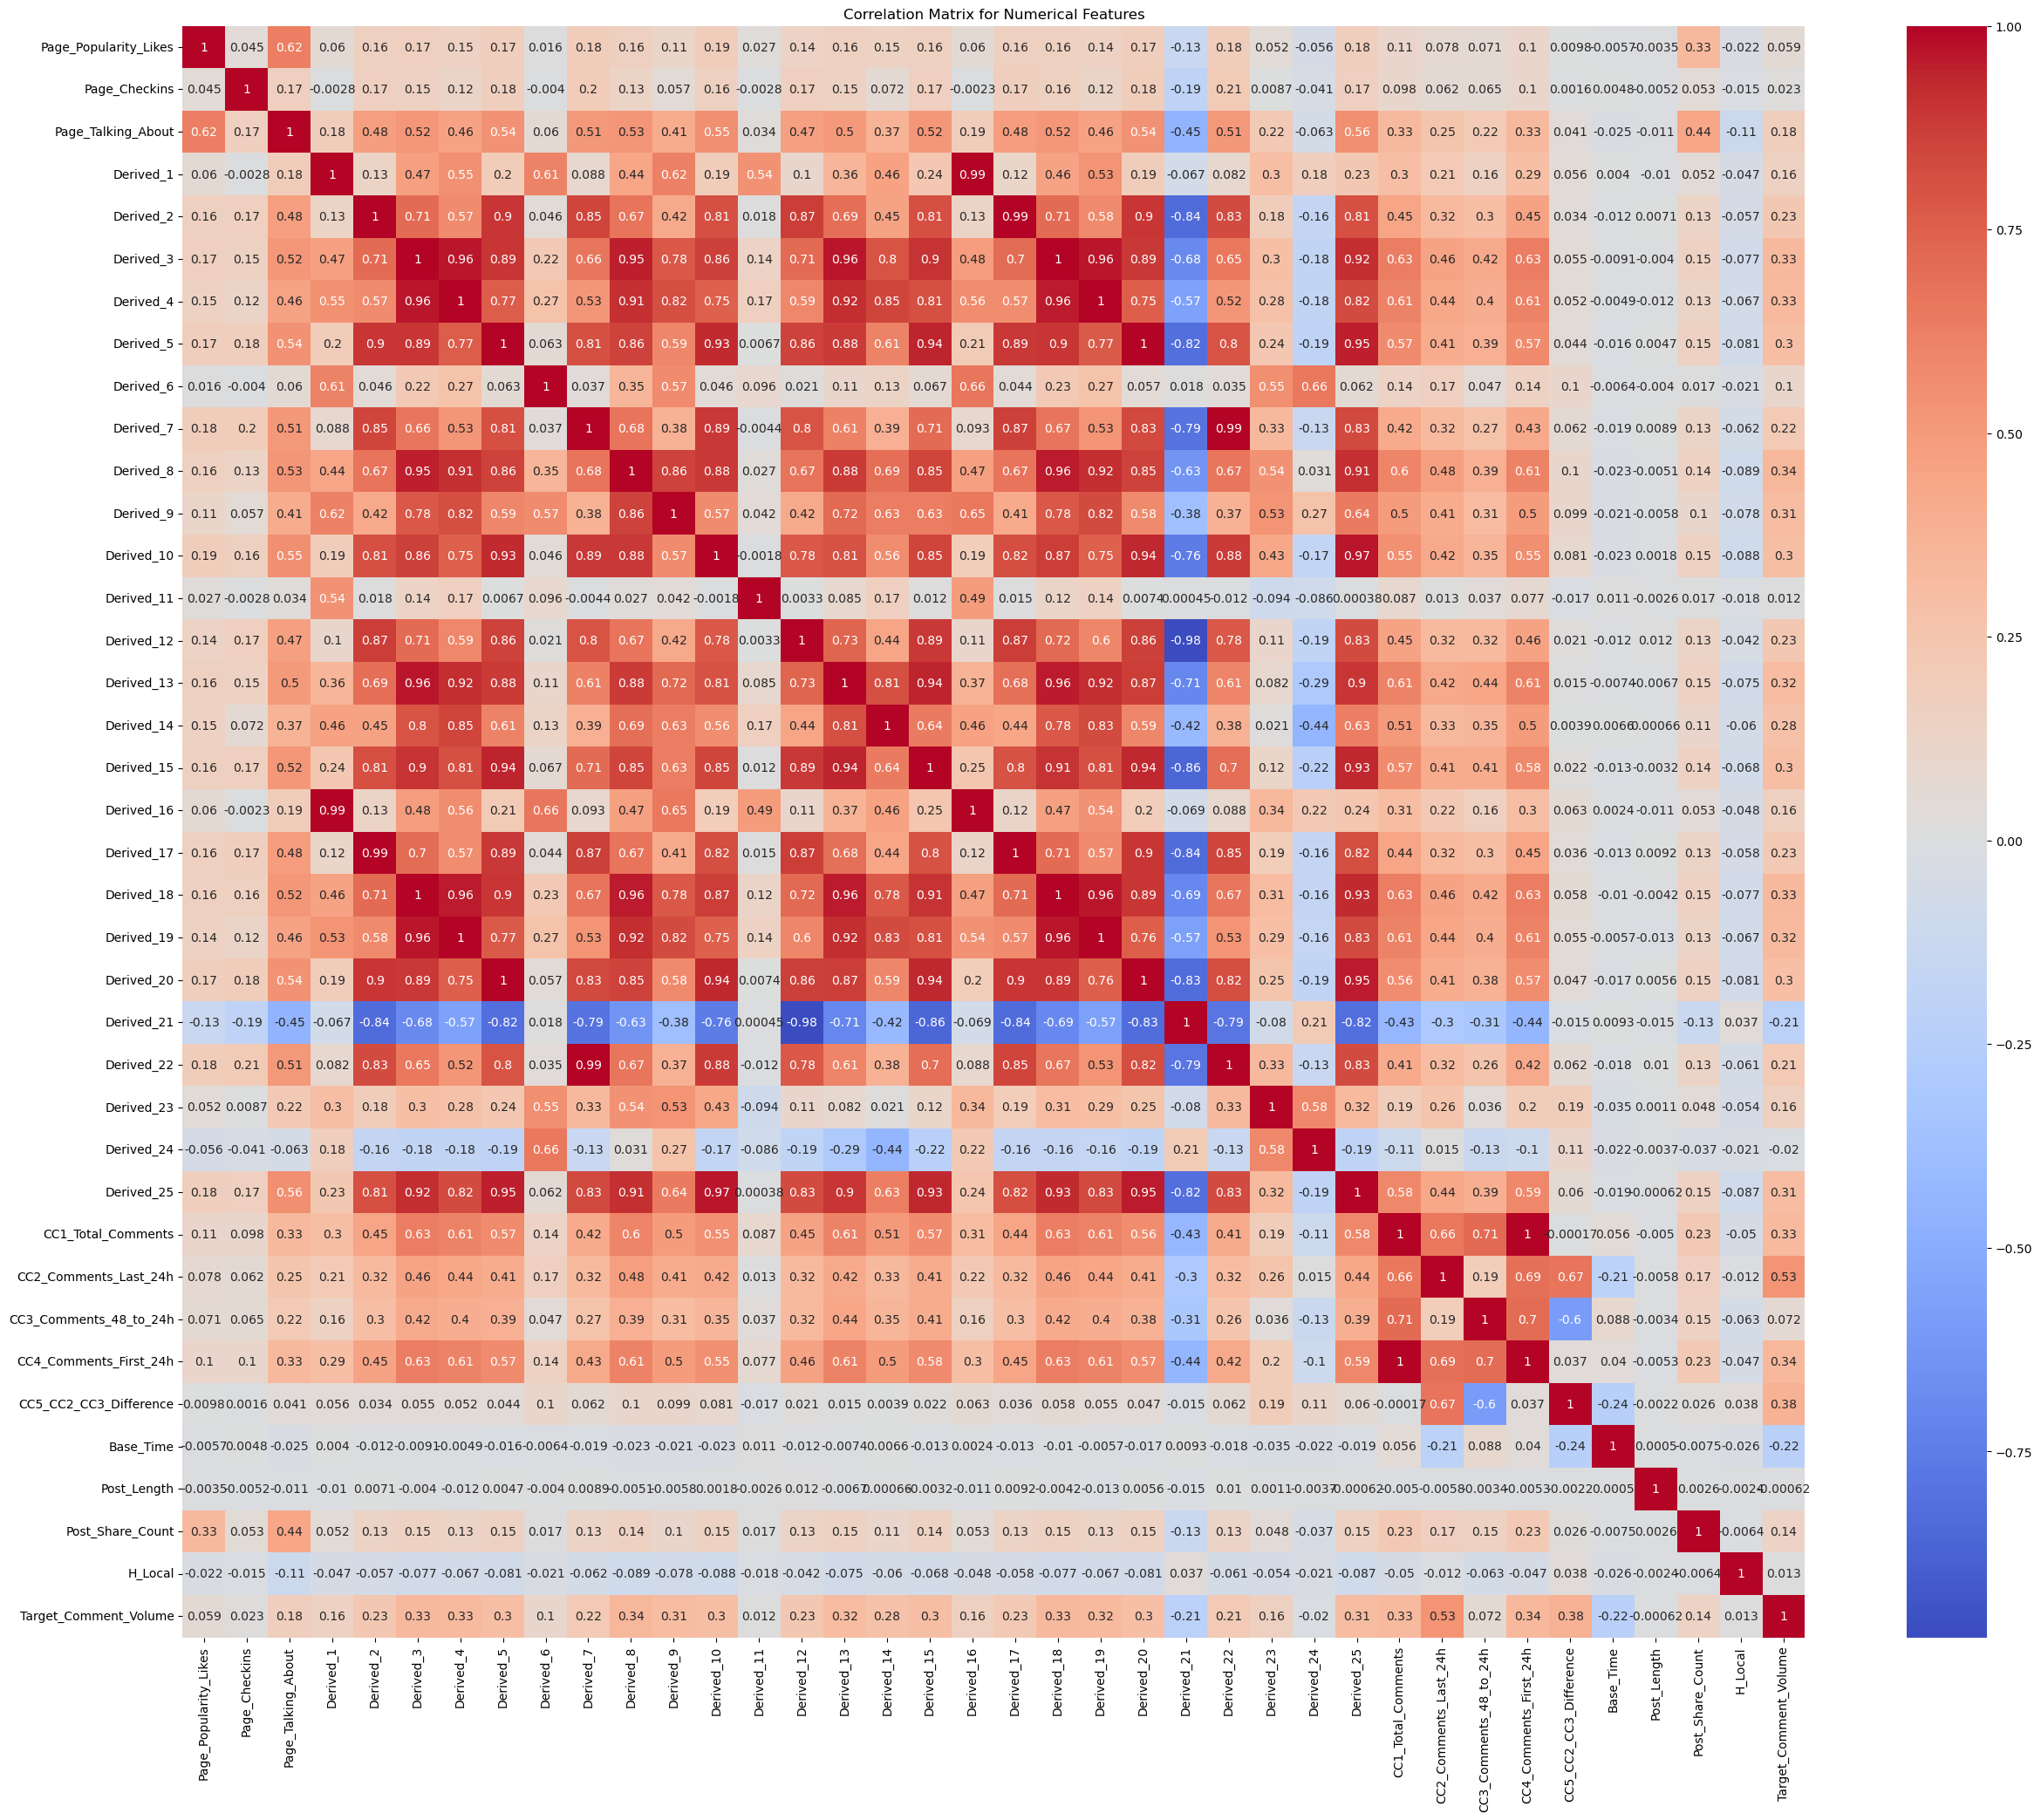

In [22]:
# lec 8 slide 45 - visualizing similarities between features with a correlation matrix
plt.figure(figsize=(30, 24))
sns.heatmap(numerical_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

Target_Binned
0           22578
1–10        13703
11–100       4079
101–1000      584
1000+           4
Name: count, dtype: int64


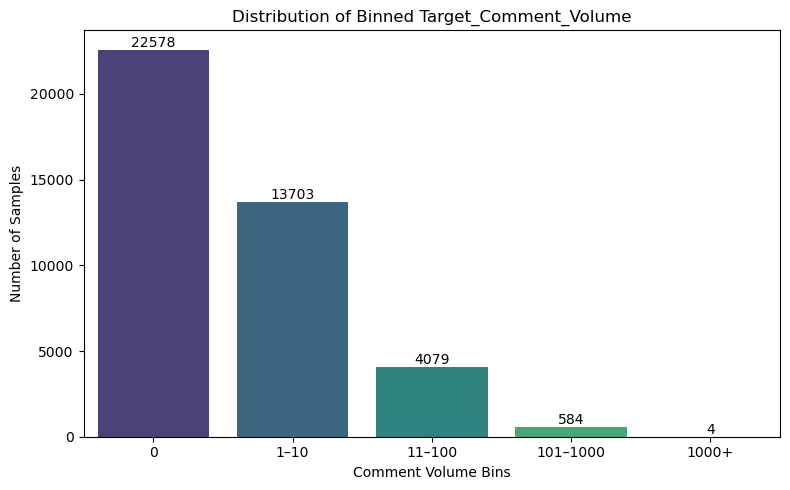

In [23]:
# visualize the Target_Comment_Volume
bins = [-1, 0, 10, 100, 1000, float('inf')]
labels = ['0', '1–10', '11–100', '101–1000', '1000+']

data['Target_Binned'] = pd.cut(data['Target_Comment_Volume'], bins=bins, labels=labels)

binned_counts = data['Target_Binned'].value_counts().sort_index()

print(binned_counts)

# Convert to DataFrame
binned_df = binned_counts.reset_index()
binned_df.columns = ['Bin', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(data=binned_df, x='Bin', y='Count', hue='Bin', palette='viridis')
plt.title('Distribution of Binned Target_Comment_Volume')
plt.xlabel('Comment Volume Bins')
plt.ylabel('Number of Samples')

# Optional: add counts on top of bars
for i, count in enumerate(binned_counts.values):
    plt.text(i, count + 2, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()